In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings("ignore")

In [241]:
df_sales = pd.read_csv('SalesTransactionv4a-230918-164139.csv')
df_sales

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


In [242]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [243]:
df_sales[df_sales['Quantity']<0]

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
1616,C581484,12/9/2019,23843,Paper Craft Little Birdie,6.19,-80995,16446.0,United Kingdom
1617,C581490,12/9/2019,22178,Victorian Glass Hanging T-Light,6.19,-12,14397.0,United Kingdom
1618,C581490,12/9/2019,23144,Zinc T-Light Holder Stars Small,6.04,-11,14397.0,United Kingdom
1619,C581568,12/9/2019,21258,Victorian Sewing Box Large,6.19,-5,15311.0,United Kingdom
1620,C581569,12/9/2019,84978,Hanging Heart Jar T-Light Holder,6.19,-1,17315.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


# Data Cleansing
Eksekusi 2 code dibawah ini

In [244]:
# 1. Ubah kolom Date menjadi tipe datetime
df_sales['Date']= pd.to_datetime(df_sales['Date'])

# 2. Buang semua transaksi yang memiliki quantity negative atau yang TransactionNo diawali dengan C
df_sales = df_sales[df_sales['TransactionNo'].str[0]!='C']

In [245]:
df_sales['revenue'] = df_sales['Quantity']*df_sales['Price']

# Country Analysis

In [246]:
best_country_rvn = df_sales.groupby('Country')['revenue'].sum().reset_index()
best_country_rvn.sort_values('revenue', ascending=False, inplace=True)
best_country_rvn.count()

Country    38
revenue    38
dtype: int64

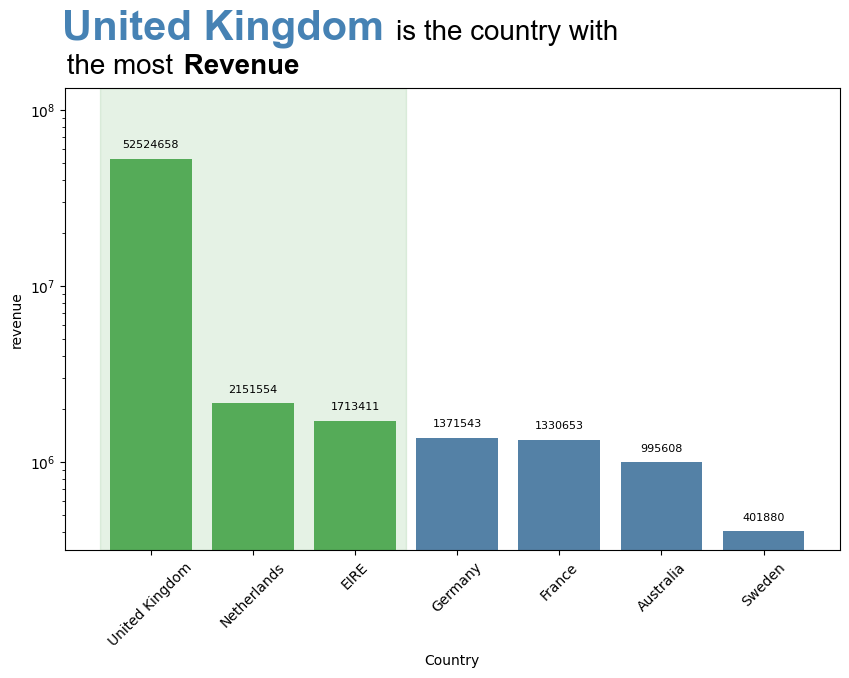

In [247]:
plt.figure(figsize=(10, 6))
palette = ['#51bd55' if i < 3 else 'steelblue' for i in range(7)]
ax = sns.barplot(x='Country', y='revenue', data=best_country_rvn.head(7), ci=None, palette = palette)
for p in plt.gca().patches:
    height = p.get_height()
    rounded_height = round(height)
    plt.gca().annotate(f'{rounded_height}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                       fontsize=8, color='black')
ax.text(-0.87,250000000, 'United Kingdom', ha='left', fontsize=30, fontweight='bold',fontname='Arial', color = 'steelblue')
ax.text(2.4,250000000, 'is the country with', ha='left', fontsize=20,fontname='Arial')
ax.text(-0.9,160000000, ' the most', ha='left', fontsize=20,fontname='Arial')
ax.text(0.25,160000000, ' Revenue', ha='left', fontsize=20,fontname='Arial', fontweight='bold')
plt.yscale('log')
plt.xticks(rotation=45)
plt.ylim(0, 132524658)
plt.axvspan(-0.5, 2.5, alpha=0.1, color='green')
plt.show()

In [248]:
best_country_cst = df_sales[['CustomerNo','Country']]
best_country_cst = best_country_cst.groupby(['Country'])['CustomerNo'].count().reset_index()
best_country_cst.sort_values('CustomerNo', ascending=False, inplace=True)
best_country_cst.rename(columns={'CustomerNo':'total_cst'}, inplace=True)

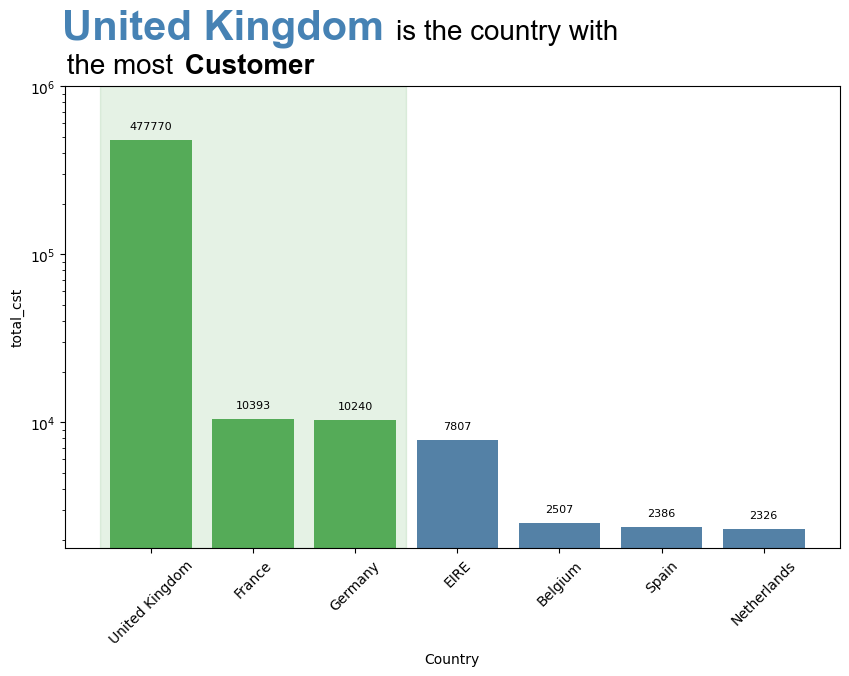

In [249]:
plt.figure(figsize=(10, 6))
palette = ['#51bd55' if i < 3 else 'steelblue' for i in range(7)]
ax = sns.barplot(x='Country', y='total_cst', data=best_country_cst.head(7), ci=None, palette = palette)
for p in plt.gca().patches:
    height = p.get_height()
    rounded_height = round(height)
    plt.gca().annotate(f'{rounded_height}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                       fontsize=8, color='black')
ax.text(-0.87,1900000, 'United Kingdom', ha='left', fontsize=30, fontweight='bold',fontname='Arial', color = 'steelblue')
ax.text(2.4,1900000, 'is the country with', ha='left', fontsize=20,fontname='Arial')
ax.text(-0.9,1200000, ' the most', ha='left', fontsize=20,fontname='Arial')
ax.text(0.25,1200000, ' Customer', ha='left', fontsize=20,fontname='Arial', fontweight='bold')
plt.yscale('log')
plt.ylim(0, 1000000)
plt.xticks(rotation=45)
plt.axvspan(-0.5, 2.5, alpha=0.1, color='green')
plt.show()

## Conclusion

1. Terdapat 38 Negara yang pernah melakukan transaksi pada platform
2. Tiga negara revenue terbaik adalah: United Kingdom, Netherlands, dan EIRE
3. Tiga negara dengan jumlah customer terbanyak adalah United Kingdom, France, dan Germany
4. Netherland menjadi negara yang sangat berpotensial karena meskipun jumlah customer tidak terlalu banyak namun menjadi top 3 best counties revenue

# Top Contributing products

Pada retail store, ada banyak jenis barang yang dijual.
Memahami karakteristik penjualan di setiap barang sangatlah penting.  
Barang-barang dengan minat tinggi dari customer menjadi kunci bisnis untuk meraih untung.
Barang-barang dengan minat rendah dari masyarakat akan menjadi beban dari usaha apabila bisnis menyetok terlalu banyak.

Salah satu metode segmentasi yang digunakan adalah menggunakan segmentasi berdasarkan :
- Volume transaksi : Berapa banyak transaksi yang melibatkan suatu produk (Tidak mempedulikan banyaknya barang dalam 1 transaksi)
- Revenue total : Berapa dolar revenue yang dihasilkan dari penjualan produk ini.

Buatlah segmentasi produk berdasarkan volume dan revenue total dengan aturan sebagai berikut :

1. total_revenue didefinisikan sebagai perkalian harga barang dengan banyaknya pembelian
2. 20% produk dengan volume transaksi transaksi tertinggi masuk kategori "Popular". 20 - 80% Masuk kategori "Normal" dan sisanya masuk ke kategori "Low"
3. 20% produk dengan total revenue tertinggi masuk kategori "Popular". 20 - 80% Masuk kategori "Normal" dan sisanya masuk ke kategori "Low"
4. Berdasarkan penggabungan segmentasi no.2 dan no.3, apabila suatu produk Popular dari segi volume transaksi dan total revenue, maka segmentasi final dari produk tersebut adalah "Super Popular". Apabila salah satu atribut populer sementara atribut lainnya normal, maka segmentasi finalnya adalah "Popular". Apabila kedua atributnya "Low", maka segmentasi finalnya adalah "Low". Semua kombinasi lain selain yang disebutkan masuk ke kategori "Normal"

## Pertanyaan
1. Barang tipe apa yang masuk ke kategori super populer pada bulan November 2019?
2. Apakah barang yang populer di November 2019 sama dengan barang yang populer di 
3. Apakah barang yang masuk kategori super populer di november sama dengan barang super populer di July ?

$$\ \text{Position of } Q_k = \frac{k \cdot (n+1)}{100} \

Jika posisi kuartil adalah nilai data yang tepat, gunakan nilai tersebut. Jika posisi kuartil bukan nilai data yang tepat, ambil nilai rata-rata antara dua nilai terdekat:

$$ \ Q_k = \text{average of the two nearest data points} \

In [250]:
df_seg_prod = df_sales.groupby(['ProductName'])[['Quantity','revenue']].sum().reset_index()

#20% produk dengan total Quantity tertinggi masuk kategori "Popular". 20 - 80% Masuk kategori "Normal" dan sisanya masuk ke kategori "Low"
bins = [0, df_seg_prod['Quantity'].quantile(0.2), df_seg_prod['Quantity'].quantile(0.8), df_seg_prod['Quantity'].max()]
df_seg_prod['Cat_prod_qty'] = pd.cut(df_seg_prod['Quantity'], bins=bins, labels=['Low','Normal','Popular'])

#20% produk dengan total revenue tertinggi masuk kategori "Popular". 20 - 80% Masuk kategori "Normal" dan sisanya masuk ke kategori "Low"
bins = [0, df_seg_prod['revenue'].quantile(0.2), df_seg_prod['revenue'].quantile(0.8), df_seg_prod['revenue'].max()]
df_seg_prod['Cat_prod_rvn'] = pd.cut(df_seg_prod['revenue'], bins=bins, labels=['Low','Normal','Popular'])

'''Berdasarkan penggabungan segmentasi no.2 dan no.3, apabila suatu produk Popular dari segi volume transaksi dan total revenue, maka segmentasi 
final dari produk tersebut adalah "Super Popular". Apabila salah satu atribut populer sementara atribut lainnya normal, maka segmentasi finalnya 
adalah "Popular". Apabila kedua atributnya "Low", maka segmentasi finalnya adalah "Low". Semua kombinasi lain selain yang disebutkan masuk ke kategori "Normal'''
segmentation_function = lambda qty, rvn: 'Super Popular' if qty == 'Popular' and rvn == 'Popular' else \
                                           'Popular' if qty == 'Popular' or rvn == 'Popular' else \
                                           'Low' if qty == 'Low' and rvn == 'Low' else \
                                           'Normal'
df_seg_prod['Cat_prod'] = list(map(segmentation_function, df_seg_prod['Cat_prod_qty'], df_seg_prod['Cat_prod_rvn']))

#Gabungkan ke dataset utama
df_sales = df_sales.merge(df_seg_prod[['ProductName','Cat_prod_qty','Cat_prod_rvn','Cat_prod']], on='ProductName', how='left')
df_sales

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,revenue,Cat_prod_qty,Cat_prod_rvn,Cat_prod
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64,Normal,Normal,Normal
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40,Popular,Popular,Super Popular
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36,Normal,Normal,Normal
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80,Normal,Normal,Normal
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64,Normal,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...
527760,536585,2018-12-01,37449,Ceramic Cake Stand + Hanging Cakes,20.45,2,17460.0,United Kingdom,40.90,Normal,Normal,Normal
527761,536590,2018-12-01,22776,Sweetheart 3 Tier Cake Stand,20.45,1,13065.0,United Kingdom,20.45,Normal,Popular,Popular
527762,536590,2018-12-01,22622,Box Of Vintage Alphabet Blocks,20.45,2,13065.0,United Kingdom,40.90,Normal,Popular,Popular
527763,536591,2018-12-01,37449,Ceramic Cake Stand + Hanging Cakes,20.45,1,14606.0,United Kingdom,20.45,Normal,Normal,Normal


### Best Product

In [251]:
df_seg_prod = df_seg_prod.sort_values(by='revenue', ascending=False)
df_seg_prod

,ProductName,Quantity,revenue,Cat_prod_qty,Cat_prod_rvn,Cat_prod
2203,Paper Craft Little Birdie,80995,1002718.10,Popular,Popular,Super Popular
1887,Medium Ceramic Top Storage Jar,78033,881990.18,Popular,Popular,Super Popular
2481,Popcorn Holder,56921,587433.94,Popular,Popular,Super Popular
3670,World War 2 Gliders Asstd Designs,55047,569735.39,Popular,Popular,Super Popular
825,Cream Hanging Heart T-Light Holder,37956,484592.69,Popular,Popular,Super Popular
...,...,...,...,...,...,...
1000,Dusty Pink Christmas Tree 30cm,1,11.53,Low,Low,Low
2316,Pink Crystal Guitar Phone Charm,1,11.12,Low,Low,Low
1546,Hen House W Chick In Nest,1,10.68,Low,Low,Low
2837,Set 10 Cards Snowy Robin 17099,1,6.19,Low,Low,Low


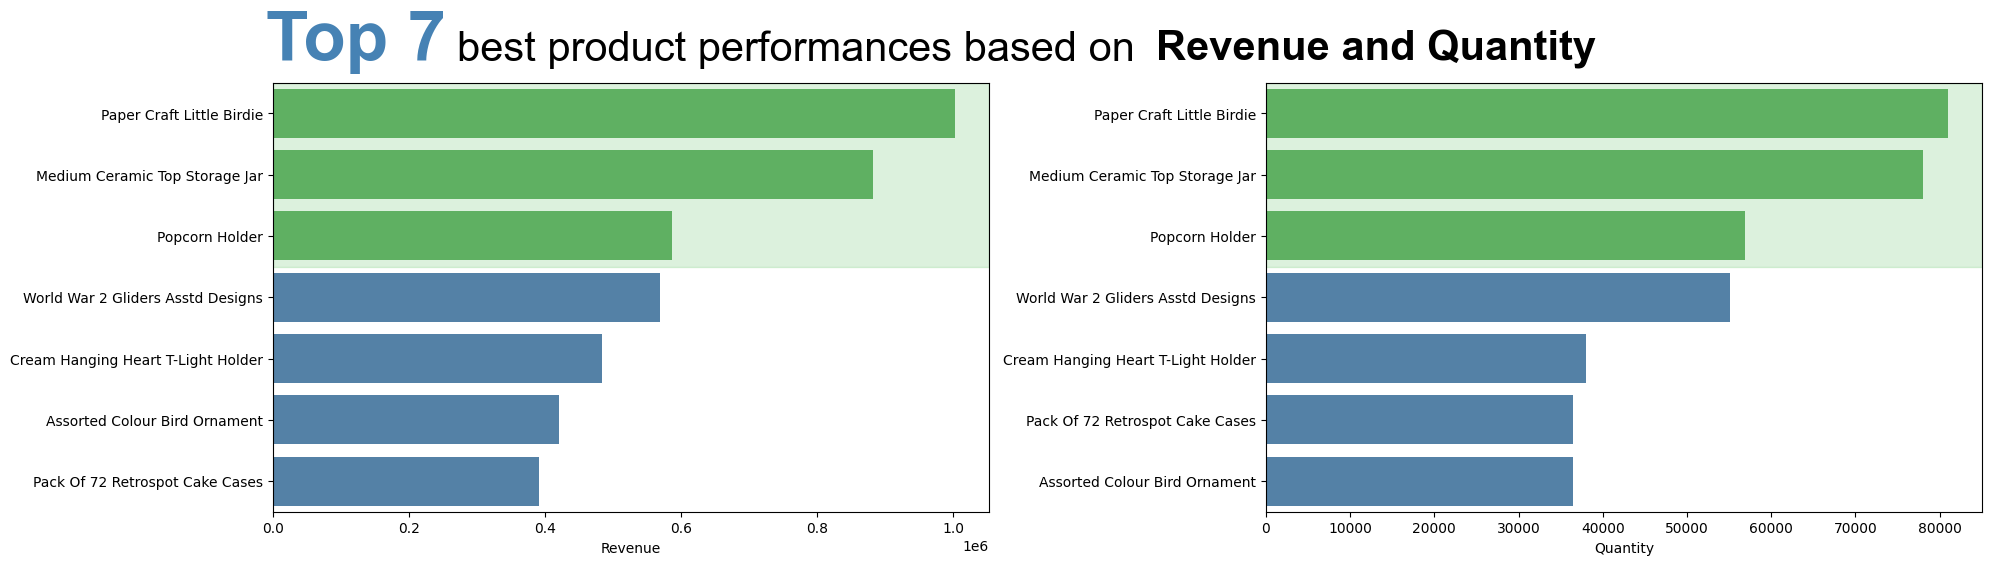

In [252]:
fig = plt.figure(figsize=(20, 5))
gs = GridSpec(1, 2, width_ratios=[1, 1])


ax0 = plt.subplot(gs[0])
ax0.axhspan(-0.5, 2.5, alpha=0.2, color='#51bd55')
palette = ['#51bd55' if i < 3 else 'steelblue' for i in range(7)]
sns.barplot(ax=ax0, data=df_seg_prod.head(7), x='revenue', y='ProductName', errorbar=None, orient='h', palette=palette)
ax0.set_ylabel('')
ax0.set_xlabel('Revenue')

ax1 = plt.subplot(gs[1])
ax1.axhspan(-0.5, 2.5, alpha=0.2, color='#51bd55')
palette_quantity = ['#51bd55' if i < 3 else 'steelblue' for i in range(7)]
sns.barplot(ax=ax1, data=df_seg_prod.head(7).sort_values(by='Quantity', ascending=False), x='Quantity', y='ProductName', errorbar=None, orient='h', palette=palette_quantity)
ax1.set_ylabel('')
ax1.set_xlabel('Quantity')

fig.text(0.18, 1.055, 'Top 7', ha='center', va='center', fontsize=50, fontweight='bold', color='steelblue', fontname='Arial')
fig.text(0.4, 1.04, 'best product performances based on', ha='center', va='center', fontsize=30,fontname='Arial')
fig.text(0.69, 1.04, 'Revenue and Quantity', ha='center', va='center', fontsize=30, fontweight='bold',fontname='Arial')

plt.tight_layout(pad=1)
plt.show()


In [253]:
best_country = df_sales[df_sales['Country'].isin(['United Kingdom', 'Netherlands', 'EIRE'])].groupby(['ProductName', 'Country'])['revenue'].sum().reset_index()
best_england = best_country[best_country['Country']=='United Kingdom'].sort_values(by='revenue', ascending=False).head(5)
best_Netherlands = best_country[best_country['Country']=='Netherlands'].sort_values(by='revenue', ascending=False).head(5)
best_EIRE = best_country[best_country['Country']=='EIRE'].sort_values(by='revenue', ascending=False).head(5)

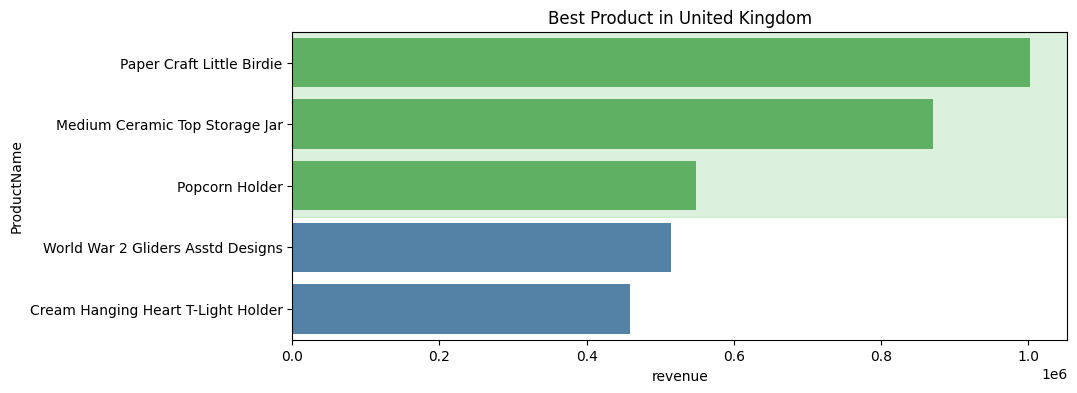

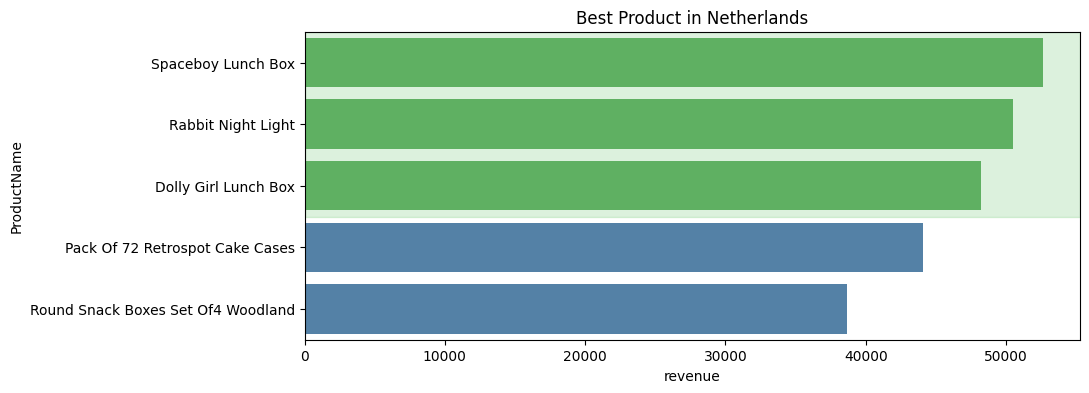

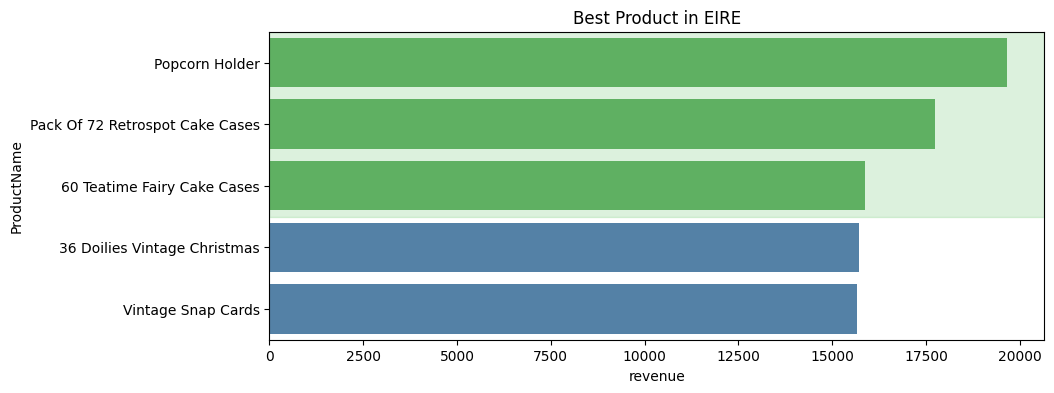

In [254]:
plt.figure(figsize=(10, 4))
plt.axhspan(-0.5, 2.5, alpha=0.2, color='#51bd55')
palette = ['#51bd55' if i < 3 else 'steelblue' for i in range(5)]
sns.barplot(data=best_england, x="revenue", y="ProductName", palette= palette)
plt.title('Best Product in United Kingdom')
plt.show()
plt.figure(figsize=(10, 4))
plt.axhspan(-0.5, 2.5, alpha=0.2, color='#51bd55')
palette = ['#51bd55' if i < 3 else 'steelblue' for i in range(5)]
sns.barplot(data=best_Netherlands, x="revenue", y="ProductName", palette= palette)
plt.title('Best Product in Netherlands')
plt.show()
plt.figure(figsize=(10, 4))
plt.axhspan(-0.5, 2.5, alpha=0.2, color='#51bd55')
palette = ['#51bd55' if i < 3 else 'steelblue' for i in range(5)]
sns.barplot(data=best_EIRE, x="revenue", y="ProductName", palette= palette)
plt.title('Best Product in EIRE')
plt.show()

### Product by Month

In [255]:
df = df_sales.groupby([df_sales['Date'].dt.strftime('%B %Y'),'ProductName'])[['Quantity','revenue']].sum().reset_index()

bins = [0, df['revenue'].quantile(0.2), df['revenue'].quantile(0.8), df['revenue'].max()]
df['Cat_prod_rvn_mnth'] = pd.cut(df['revenue'], bins=bins, labels=['Low','Normal','Popular'])

bins = [0, df['Quantity'].quantile(0.2), df['Quantity'].quantile(0.8), df['Quantity'].max()]
df['Cat_prod_qty_mnth'] = pd.cut(df['Quantity'], bins=bins, labels=['Low','Normal','Popular'])

segmentation_function = lambda qty, rvn: 'Super Popular' if qty == 'Popular' and rvn == 'Popular' else \
                                           'Popular' if qty == 'Popular' or rvn == 'Popular' else \
                                           'Low' if qty == 'Low' and rvn == 'Low' else \
                                           'Normal'
df['Cat_prod'] = list(map(segmentation_function, df['Cat_prod_qty_mnth'], df['Cat_prod_rvn_mnth']))
df.sort_values(by='revenue',ascending=False)

,Date,ProductName,Quantity,revenue,Cat_prod_rvn_mnth,Cat_prod_qty_mnth,Cat_prod
9030,December 2019,Paper Craft Little Birdie,80995,1002718.10,Popular,Popular,Super Popular
13671,January 2019,Medium Ceramic Top Storage Jar,74215,840113.80,Popular,Popular,Super Popular
26753,November 2019,Rabbit Night Light,14954,159889.96,Popular,Popular,Super Popular
26717,November 2019,Popcorn Holder,12460,123424.90,Popular,Popular,Super Popular
2333,April 2019,World War 2 Gliders Asstd Designs,10239,107343.18,Popular,Popular,Super Popular
...,...,...,...,...,...,...,...
27222,November 2019,Silver Roccoco Chandelier,1,5.97,Low,Low,Low
25043,November 2019,Assorted Creepy Crawlies,1,5.97,Low,Low,Low
20909,March 2019,Funky Monkey Gift Bag Medium,1,5.55,Low,Low,Low
14627,January 2019,The King Gift Bag,1,5.46,Low,Low,Low


In [256]:
df_super_popular = df[(df['Cat_prod'] == 'Super Popular')]
total_super_popular = df_super_popular.groupby(df['ProductName']).count()
df_super_popular = df_super_popular.merge(total_super_popular['Date'], on='ProductName', how='left')
df_super_popular = df_super_popular.rename(columns={'Date_y': 'Ttl_Spr_Pplr', 'Date_x': 'Date'})

In [257]:
month = pd.to_datetime(df_super_popular['Date']).sort_values().dt.strftime('%B %Y').unique()
for month in month:
    df_super_popular[month] = df_super_popular.apply(lambda row: row['Date'] == month if pd.notnull(row['ProductName']) else False, axis=1)

for month_column in df_super_popular.columns[-13:]:
    df_super_popular[month_column] = df_super_popular.groupby('ProductName')[month_column].transform('any')

### 1. Barang tipe apa yang masuk ke kategori super populer pada bulan November 2019?
terdapat 758 produk yang termasuk ke dalam kategori super populer pada bulan November

In [258]:
best_nov = (df_super_popular[df_super_popular['Date']=='November 2019']).groupby(['ProductName'])[['Quantity','revenue']].sum().reset_index().sort_values(by='revenue',ascending=False)
best_nov

,ProductName,Quantity,revenue
476,Rabbit Night Light,14954,159889.96
470,Popcorn Holder,12460,123424.90
427,Paper Chain Kit 50'S Christmas,7908,95293.96
61,Asstd Design 3d Paper Stickers,12551,77744.92
166,Cream Hanging Heart T-Light Holder,4944,57392.52
...,...,...,...
184,Egg Cup Henrietta Hen Cream,219,2476.16
407,Pack Of 12 Woodland Tissues,252,2465.31
367,Magnets Pack Of 4 Vintage Collage,245,2461.87
410,Pack Of 6 Cocktail Parasol Straws,260,2448.25


### 3. Apakah barang yang masuk kategori super populer di november sama dengan barang super populer di July
terdapat 424 produk super populer bulan november yang tidak termasuk ke kategori super populer di bulan juli

In [259]:
#Daftar produk yang tidak termasuk super populer di bulan juli
pplr_jul_nov = df_super_popular[(df_super_popular['November 2019'] == True) & (df_super_popular['July 2019'] == False)]
pplr_jul_nov =  pplr_jul_nov.groupby('ProductName')['Quantity','revenue'].sum().reset_index().sort_values('revenue', ascending=False)
pplr_jul_nov

,ProductName,Quantity,revenue
267,Please One Person Metal Sign,12112,140893.60
352,Small Chinese Style Scissor,13093,136087.44
119,Fairy Cake Flannel Assorted Colour,9464,111420.50
305,Rotating Silver Angels T-Light Hldr,9087,104524.60
414,Wooden Heart Christmas Scandinavian,10051,97593.76
...,...,...,...
199,Kitty Pencil Erasers,260,2635.94
347,Silver Fabric Mirror,279,2629.99
131,Feltcraft Hairband Red And Blue,249,2585.93
129,Feltcraft Girl Amelie Kit,215,2535.88


In [260]:
# Daftar Produk Super Popular Selama 13 Bulan
all_month_supr_poplr = (df_super_popular[df_super_popular['Ttl_Spr_Pplr']==13]).groupby('ProductName')['Quantity','revenue'].sum().reset_index().sort_values('revenue', ascending=False)

In [261]:
all_month_supr_poplr.count()

ProductName    29
Quantity       29
revenue        29
dtype: int64

In [262]:
all_month_supr_poplr.head(10)

,ProductName,Quantity,revenue
17,Popcorn Holder,56921,587433.94
28,World War 2 Gliders Asstd Designs,55047,569735.39
6,Cream Hanging Heart T-Light Holder,37956,484592.69
3,Assorted Colour Bird Ornament,36493,421318.74
16,Pack Of 72 Retrospot Cake Cases,36515,391485.03
22,Regency Cakestand 3 Tier,13890,307483.85
9,Jumbo Bag Red Retrospot,48478,297205.04
25,Victorian Glass Hanging T-Light,24304,274287.34
14,Pack Of 12 London Tissues,26135,271027.14
19,Red Harmonica In Box,21937,246003.47


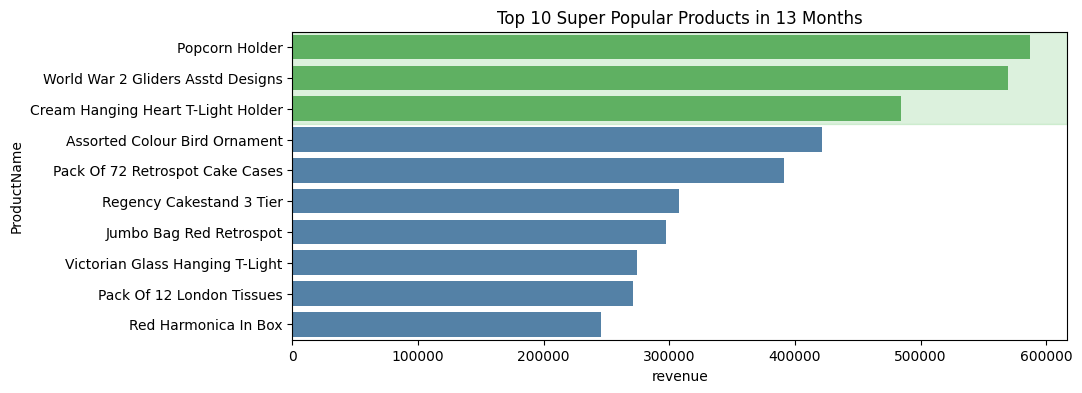

In [263]:
plt.figure(figsize=(10, 4))
plt.axhspan(-0.5, 2.5, alpha=0.2, color='#51bd55')
palette = ['#51bd55' if i < 3 else 'steelblue' for i in range(10)]
sns.barplot(x='revenue', y='ProductName', data=all_month_supr_poplr.head(10), palette=palette)
plt.title('Top 10 Super Popular Products in 13 Months')
plt.show()

### Conclusion

1. Untuk menghindari outlier, melakukan segmentasi customer menggunakan quartile
2. Produk paling berpengaruh kepada revenue dan penjualan terbanyak adalah Paper Craft Little Birdie, Medium Ceramic Top Storage Jar, Popcorn Holder
3. Disetiap negara memiliki produk penjualan terbaik yang berbeda beda
4. Terdapat 29 Produk yang Super Populer sejak awal hingga sekarang

# Retention Cohort Analysis

Analisis kohort adalah metode analisis yang digunakan untuk mempelajari perilaku konsumen atau pengguna dari kelompok yang sama dalam periode waktu tertentu.   
Contoh Kohort : Kohort kustomer yang bergabung pada bulan mei

Analisis retensi adalah analisis untuk melihat seberapa besar persentase pengguna atau pelanggan yang kembali menggunakan produk atau layanan dalam periode waktu tertentu.

Dengan menganalisis kohort dan retensi, perusahaan atau organisasi dapat mengidentifikasi tren dan pola dalam perilaku pengguna atau pelanggan.

Berikut cuplikan matriks retensi yang akan kalian hasilkan pada bagian ini : 

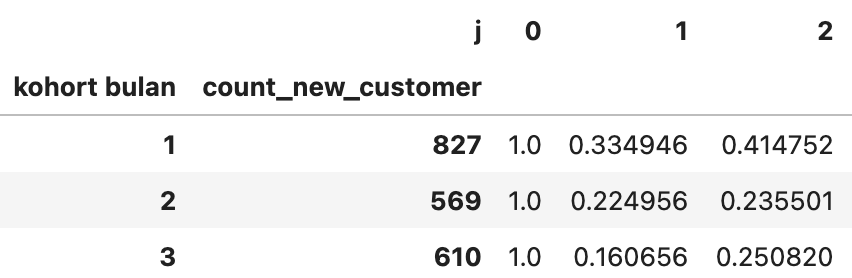

Cara baca :  
Pada bulan januari, ada 827 customer baru.  
33% dari 827 customer melakukan transaksi 1 bulan kemudian.  
41.4% dari 827 customer melakukan transasksi 2 bulan kemduain.  

Hal ini menunjukkan bahwa sekitar sepertiga customer yang melanjutkan transaksi setelah mendaftar pada bulan januari.  

Sedangkan pada kohort bulan februari, ada 569 customer baru dan hanya 22% customer yang kembali bertransaksi sebulan setelahnya  

Buatlah matriks kohort retensi per bulan menggunakan data dari 1 januari 2019 hingga 30 november 2019
Petunjuk : 
1. Hitung tanggal berapa transaksi pertama customer. Disini kita menggunakna asumsi bahwa transaksi pertama pada tahun 2019 adalah transaksi pertama customer.
2. Lakukan iterasi untuk setiap bulan. Ambil berapa banyak customer yang mendaftar dan berapa banyak customer yang sama yang melakukan transaksi di bulan bulan berikutnya.

## Pertanyaan
1. Bagaimana karakteristik pertumbuhan customer baru? Apakah pertumbuhan terus meningkat atau melambat?

2. Setiap bulannya tim marketing menggunakan metode promosi campaign yang berbeda-beda. Bulan mana yang menghasilkan retention paling tinggi?

### New Customer in a Month

In [264]:
df_sales['CustomerNo'].nunique()

4718

In [265]:
kohort = df_sales.copy()

In [266]:
first_trx = kohort.groupby('CustomerNo')[['Date']].min().reset_index()
first_trx ['Date'] = first_trx ['Date'].dt.strftime('%B %Y')
first_trx = first_trx.groupby('Date')[['CustomerNo']].count().reset_index()
first_trx = first_trx.rename(columns={'CustomerNo': 'new_customer'})
first_trx

,Date,new_customer
0,April 2019,321
1,August 2019,173
2,December 2018,1026
3,December 2019,47
4,February 2019,438
...,...,...
8,March 2019,503
9,May 2019,332
10,November 2019,290
11,October 2019,335


In [267]:
repeat = kohort[['Date','CustomerNo']]
repeat = repeat.groupby(['Date','CustomerNo']).count().reset_index()
repeat = repeat.groupby('CustomerNo')['Date'].apply(lambda x: x if len(x) > 1 else pd.Series([0])).reset_index()
repeat.sort_values('CustomerNo')

,CustomerNo,level_1,Date
0,12004.0,0,0
1,12006.0,0,0
2,12008.0,0,0
3,12013.0,0,0
4,12024.0,0,0
...,...,...,...
18042,18283.0,8069,2019-06-14 00:00:00
18050,18283.0,17808,2019-12-06 00:00:00
18052,18287.0,13712,2019-10-12 00:00:00
18051,18287.0,7048,2019-05-22 00:00:00


In [268]:
repeat

,CustomerNo,level_1,Date
0,12004.0,0,0
1,12006.0,0,0
2,12008.0,0,0
3,12013.0,0,0
4,12024.0,0,0
...,...,...,...
18049,18283.0,17307,2019-11-30 00:00:00
18050,18283.0,17808,2019-12-06 00:00:00
18051,18287.0,7048,2019-05-22 00:00:00
18052,18287.0,13712,2019-10-12 00:00:00


In [269]:
repeat = repeat[repeat['Date']!=0]
repeat['Date'] = pd.to_datetime(repeat['Date'])
repeat['DateDifference'] = repeat.groupby('CustomerNo')['Date'].transform(lambda x: x - x.min())

In [270]:
most_repeat_cst = df_sales.groupby(['CustomerNo', 'TransactionNo'])[['Date']].count().reset_index()
most_repeat_cst = most_repeat_cst.groupby('CustomerNo')[['TransactionNo']].count().reset_index()
most_repeat_cst.sort_values('TransactionNo', inplace=True, ascending=False)
most_repeat_cst

,CustomerNo,TransactionNo
408,12748.0,207
2085,14911.0,198
4384,17841.0,125
667,13089.0,98
2406,15311.0,91
...,...,...
2339,15226.0,1
2345,15234.0,1
2347,15236.0,1
2357,15247.0,1


### Repeat in a month

In [271]:
und_30_dys = repeat[repeat['DateDifference'] <= '31 days']
und_30_dys = und_30_dys[und_30_dys['DateDifference']!='0 days']
und_30_dys.sort_values('DateDifference')
und_30_dys = und_30_dys.drop_duplicates(subset='CustomerNo', keep='first')
und_30_dys['Date'] = und_30_dys['Date'].dt.strftime('%B %Y')
und_30_dys = und_30_dys.groupby('Date')[['CustomerNo']].count().reset_index()
und_30_dys.rename(columns={'CustomerNo': 'repeat_in_a_month'}, inplace=True)
und_30_dys

,Date,repeat_in_a_month
0,April 2019,59
1,August 2019,24
2,December 2018,224
3,December 2019,24
4,February 2019,81
...,...,...
8,March 2019,64
9,May 2019,44
10,November 2019,75
11,October 2019,63


In [272]:
first_trx = first_trx.merge(und_30_dys, on='Date', how='left')
first_trx

,Date,new_customer,repeat_in_a_month
0,April 2019,321,59
1,August 2019,173,24
2,December 2018,1026,224
3,December 2019,47,24
4,February 2019,438,81
...,...,...,...
8,March 2019,503,64
9,May 2019,332,44
10,November 2019,290,75
11,October 2019,335,63


### Repeat in two months

In [273]:
in_two_months = repeat[(repeat['DateDifference'] >= '32 days') & (repeat['DateDifference'] <= '62 days')]
in_two_months = repeat[repeat['DateDifference']!='0 days']
in_two_months = in_two_months.drop_duplicates(subset='CustomerNo', keep='first')
in_two_months = in_two_months[(in_two_months['DateDifference'] >= '32 days') & (in_two_months['DateDifference'] <= '62 days')]
in_two_months['Date'] = in_two_months['Date'].dt.strftime('%B %Y')
in_two_months = in_two_months.groupby('Date')[['CustomerNo']].count().reset_index()
in_two_months.rename(columns={'CustomerNo': 'repeat_in_2_months'}, inplace=True)

In [274]:
first_trx = first_trx.merge(in_two_months, on='Date', how='left')

### Kahort Retention

In [275]:
first_trx['repeat_in_a_month'] = first_trx['repeat_in_a_month']/first_trx['new_customer']*100
first_trx['repeat_in_2_months'] = first_trx['repeat_in_2_months']/first_trx['new_customer']*100

In [276]:
first_trx['Date'] = pd.to_datetime(first_trx['Date'])


In [277]:
first_trx.sort_values('Date', inplace=True)
first_trx['Date'] = first_trx['Date'].dt.strftime('%B %Y')
first_trx

,Date,new_customer,repeat_in_a_month,repeat_in_2_months
2,December 2018,1026,21.832359,NaN
5,January 2019,486,21.399177,30.246914
4,February 2019,438,18.493151,15.981735
8,March 2019,503,12.723658,16.500994
0,April 2019,321,18.380062,17.133956
...,...,...,...,...
1,August 2019,173,13.872832,12.716763
12,September 2019,282,10.992908,11.702128
11,October 2019,335,18.805970,12.537313
10,November 2019,290,25.862069,18.965517


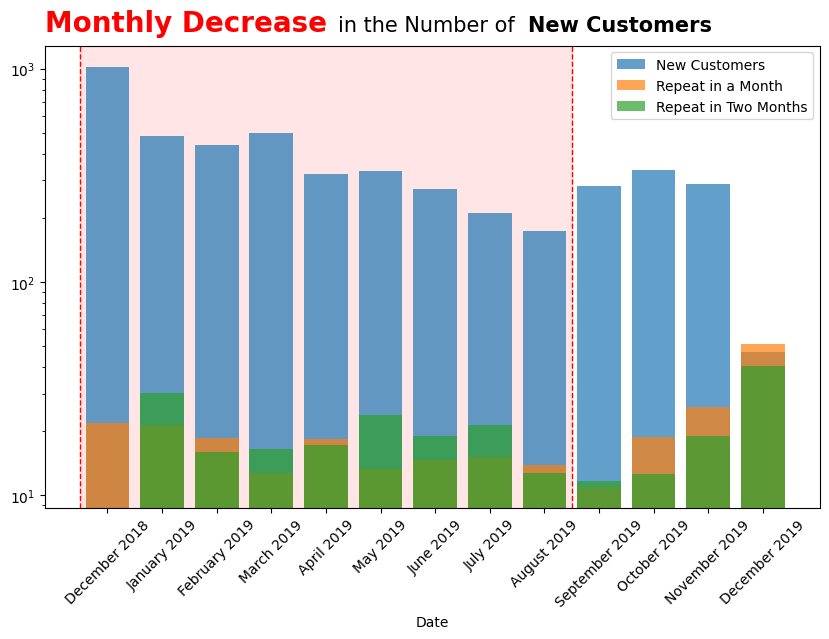

In [278]:
dates = first_trx['Date']
new_customers = first_trx['new_customer']
repeat_in_a_month = first_trx['repeat_in_a_month']
repeat_in_2_months = first_trx['repeat_in_2_months']

plt.figure(figsize=(10, 6))
plt.axvspan(-0.5, 8.5, color='red', alpha=0.1)
plt.bar(dates, new_customers, label='New Customers', alpha=0.7)
plt.bar(dates, repeat_in_a_month, label='Repeat in a Month', alpha=0.7)
plt.bar(dates, repeat_in_2_months, label='Repeat in Two Months', alpha=0.7)
plt.yscale('log')

plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.ylabel('')
plt.axvline(x=-0.5, color='red', linestyle='--', linewidth=1)
plt.axvline(x=8.5, color='red', linestyle='--', linewidth=1)
plt.text(-1.15, 1500, 'Monthly Decrease', fontsize=20, color='red', fontweight='bold')
plt.text(4.23, 1500, 'in the Number of', fontsize=15)
plt.text(7.7, 1500, 'New Customers', fontsize=15, fontweight='bold')

plt.show()

### Conclusion

1. Penurunan jumlah customer baru terlihat jelas sejak desember 2018 hingga agustus 2019
2. Marketing yang paling baik terdapat pada bulan september 2019 karena terjadi peningkatan jumlah customer baru paling tinggi
3. Kemudian peningkatan selanjutnya terjadi pada bulan oktober 2019 meskipun lebih rendah dari bulans ebelumnya
4. Terdapat penurunan jumlah customer baru pada November 2019
5. Repeat buy dalam in a month dan two month paling rendah pada bulan September 2019 dan naik secara konsisten hingga saat ini, ini menandakan tim sudah mendapatkan treatmeant yang baik terhadap customer lama

# Time Series Analysis

Time series analysis adalah analisis untuk melihat trend suatu fenomena berdasarkan waktu.

## Pertanyaan 

Pertanyaan 1 :  
Coba totalkan penjualan setiap barang per hari.   
Bagaimana trend penjualan? Apakah ada mengalami kenaikan, penurunan, atau stagnant.

Pertanyaan 2 :  
Lakukan analisis seasonality dengan melihat total order per harinya dari Senin hingga Minggu.  


In [279]:
df_sales.sort_values('Quantity', ascending=False).head(3)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,revenue,Cat_prod_qty,Cat_prod_rvn,Cat_prod
142,581483,2019-12-09,23843,Paper Craft Little Birdie,12.38,80995,16446.0,United Kingdom,1002718.1,Popular,Popular,Super Popular
466383,541431,2019-01-18,23166,Medium Ceramic Top Storage Jar,11.32,74215,12346.0,United Kingdom,840113.8,Popular,Popular,Super Popular
40898,578841,2019-11-25,84826,Asstd Design 3d Paper Stickers,6.19,12540,13256.0,United Kingdom,77622.6,Popular,Popular,Super Popular


<Figure size 3000x500 with 0 Axes>

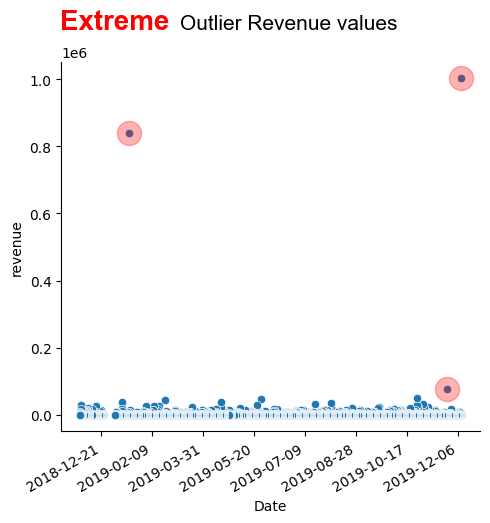

In [280]:
plt.figure(figsize=(30, 5))
sns.relplot(x='Date', y='revenue', data=df_sales)
plt.scatter(x=18239 , y=1002718.10, color='red', marker='o', s=300,alpha=0.3)
plt.scatter(x=17914 , y=840113.80, color='red', marker='o', s=300,alpha=0.3)
plt.scatter(x=18225  , y=77622.60, color='red', marker='o', s=300,alpha=0.3)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))
plt.text(17846, 1150000.10, 'Extreme', ha='left', fontsize=20, fontweight='bold',fontname='Arial', color = 'red')
plt.text(17964, 1150000.10, 'Outlier Revenue values', ha='left', fontsize=15,fontname='Arial')
plt.gcf().autofmt_xdate()
plt.show()

Extreme Outlier in revenue over 60000

<Figure size 3000x500 with 0 Axes>

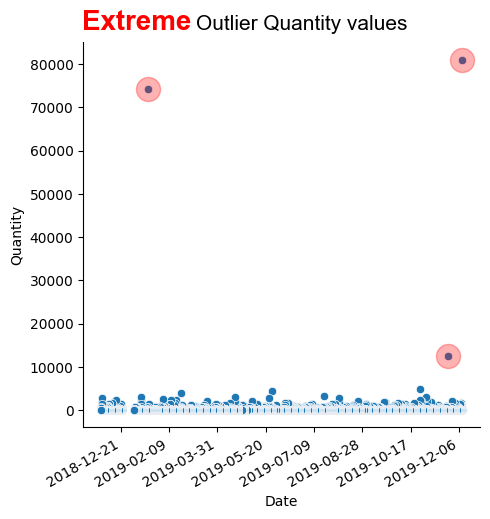

In [281]:
plt.figure(figsize=(30, 5))
sns.relplot(x='Date', y='Quantity', data=df_sales)
plt.scatter(x=18239 , y=80995, color='red', marker='o', s=300,alpha=0.3)
plt.scatter(x=17914 , y=74215, color='red', marker='o', s=300,alpha=0.3)
plt.scatter(x=18225  , y=12540, color='red', marker='o', s=300,alpha=0.3)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))
plt.text(17846,88000, 'Extreme', ha='left', fontsize=20, fontweight='bold',fontname='Arial', color = 'red')
plt.text(17964,88000, 'Outlier Quantity values', ha='left', fontsize=15,fontname='Arial')
plt.gcf().autofmt_xdate()
plt.show()

Drop extreme Outlier

In [282]:
annual_sales = df_sales[df_sales['revenue']<70000].sort_values('Date',ascending=True)
annual_sales['Date'] = annual_sales['Date'].dt.strftime('%B %Y')
annual_sales = annual_sales.groupby(['Date'])[['Quantity','revenue']].sum().reset_index()
annual_sales['Date'] = pd.to_datetime(annual_sales['Date'])
annual_sales.sort_values('Date', inplace=True)
annual_sales['Date'] = annual_sales['Date'].dt.strftime('%B %Y')
annual_sales

,Date,Quantity,revenue
2,December 2018,358908,4415415.52
5,January 2019,313076,3719742.57
4,February 2019,283227,3335017.18
8,March 2019,377999,4398401.60
0,April 2019,308417,3589497.88
...,...,...,...
1,August 2019,422060,4758356.02
12,September 2019,570125,6628303.06
11,October 2019,621429,7237417.36
10,November 2019,750803,7783574.52


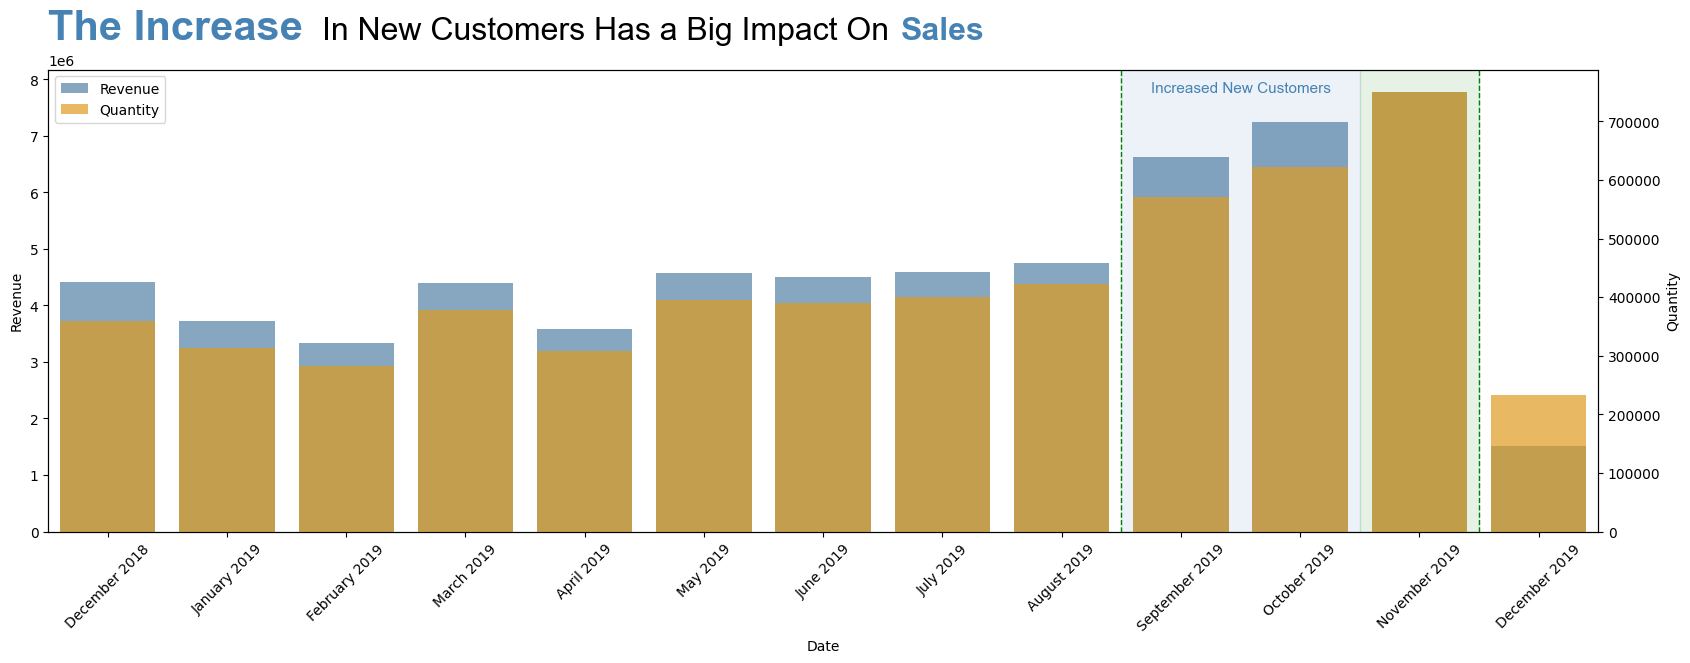

In [283]:
fig, ax1 = plt.subplots(figsize=(20, 6))

sns.barplot(data=annual_sales, y='revenue', x='Date', color='steelblue', label='Revenue', ax=ax1, alpha=0.7)
ax1.set_xlabel('Date')
ax1.set_ylabel('Revenue')
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', rotation=45)
plt.axvspan(8.5, 10.5, color='steelblue', alpha=0.1)
plt.axvspan(10.5, 11.5, color='green', alpha=0.1)

ax2 = ax1.twinx()
sns.barplot(data=annual_sales, y='Quantity', x='Date', color='orange', label='Quantity', ax=ax2 , alpha=0.7)
ax2.set_ylabel('Quantity')
ax2.tick_params(axis='y')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
plt.axvline(x=8.5, color='green', linestyle='--', linewidth=1)
plt.axvline(x=11.5, color='green', linestyle='--', linewidth=1)
plt.text(8.75, 750000, 'Increased New Customers', ha='left', fontsize=11,fontname='Arial', color = 'steelblue')
plt.text(-0.5, 840000, 'The Increase', ha='left', fontsize=30,fontname='Arial', color = 'steelblue', fontweight='bold')
plt.text(1.8, 840000, 'In New Customers Has a Big Impact On', ha='left', fontsize=23,fontname='Arial')
plt.text(6.65, 840000, 'Sales', ha='left', fontsize=23,fontname='Arial', color = 'steelblue', fontweight='bold')

plt.show()


### Weekly Sales

Pertanyaan 2 :  
Lakukan analisis seasonality dengan melihat total order per harinya dari Senin hingga Minggu.

In [284]:
weekly_sales =  df_sales[df_sales['revenue']<70000]
weekly_sales['Date'] = weekly_sales['Date'].dt.day_name()
weekly_sales = weekly_sales.groupby('Date')[['Quantity','revenue']].sum().reset_index()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_sales['Date'] = pd.Categorical(weekly_sales['Date'], categories=days_order, ordered=True)
weekly_sales = weekly_sales.sort_values('Date')
weekly_sales

,Date,Quantity,revenue
1,Monday,811148,9225486.05
5,Wednesday,470163,5341732.82
4,Thursday,870800,9879295.89
0,Friday,1039219,11863387.32
2,Saturday,1024669,11223746.52
3,Sunday,1207749,13511871.24


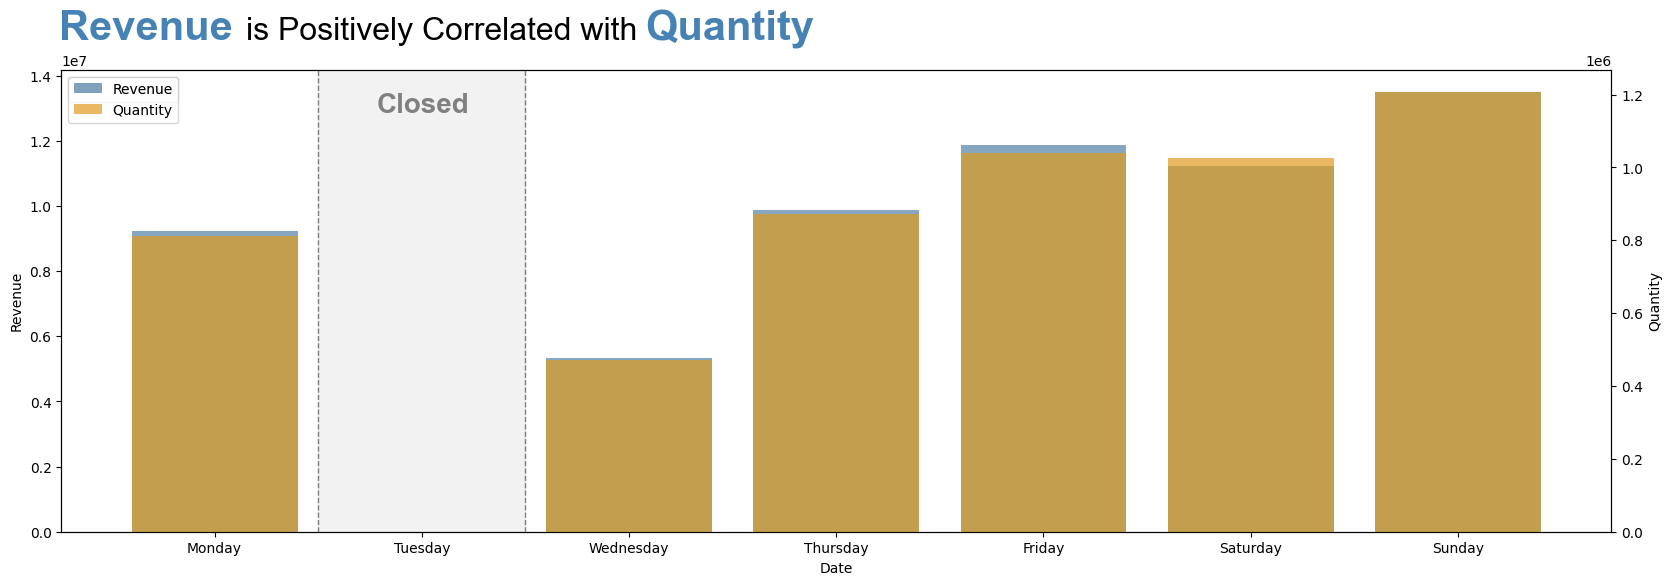

In [285]:
fig, ax1 = plt.subplots(figsize=(20, 6))

sns.barplot(data=weekly_sales, y='revenue', x='Date', color='steelblue', label='Revenue', ax=ax1, alpha=0.7)
ax1.set_xlabel('Date')
ax1.set_ylabel('Revenue')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
sns.barplot(data=weekly_sales, y='Quantity', x='Date', color='orange', label='Quantity', ax=ax2, alpha=0.7)
ax2.set_ylabel('Quantity')
ax2.tick_params(axis='y')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
plt.axvline(x=0.5, color='gray', linestyle='--', linewidth=1)
plt.axvline(x=1.5, color='gray', linestyle='--', linewidth=1)
plt.axvspan(0.5,1.5, color='gray', alpha=0.1)
plt.text(-0.75, 1350000, 'Revenue', ha='left', fontsize=30,fontname='Arial', color = 'steelblue', fontweight='bold')
plt.text(0.15, 1350000, 'is Positively Correlated with', ha='left', fontsize=23,fontname='Arial')
plt.text(2.08, 1350000, 'Quantity', ha='left', fontsize=30,fontname='Arial', color = 'steelblue', fontweight='bold')
plt.text(0.78, 1150000, 'Closed', ha='left', fontsize=20,fontname='Arial', color = 'gray', fontweight='bold')
plt.xticks(rotation=45)


plt.show()

### TimeSeries

Pertanyaan 1 :  
Coba totalkan penjualan setiap barang per hari.   
Bagaimana trend penjualan? Apakah ada mengalami kenaikan, penurunan, atau stagnant.

In [286]:
timeseries_qty = df_sales[df_sales['revenue']<70000].groupby('Date')[['Quantity']].sum().reset_index()
timeseries_rvn = df_sales[df_sales['revenue']<70000].groupby('Date')[['revenue']].sum().reset_index()

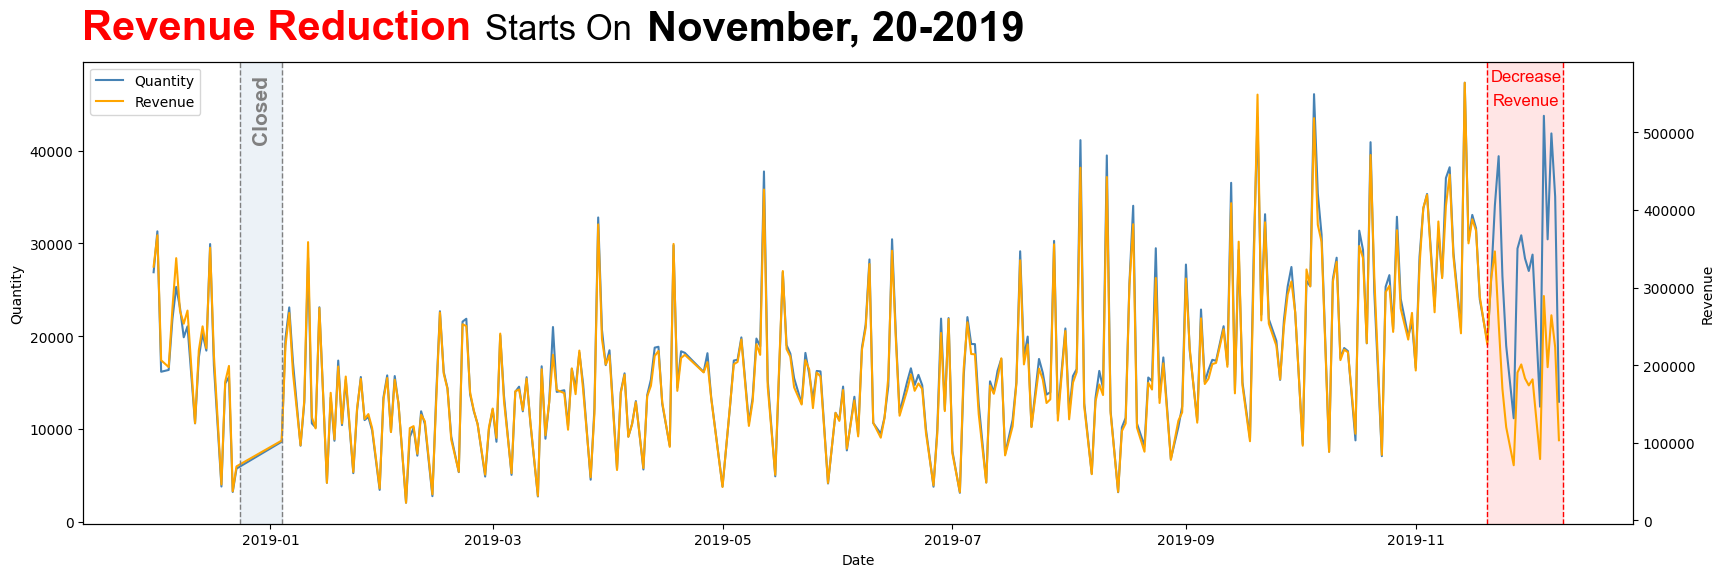

In [287]:
plt.figure(figsize=(20, 6))
plt.axvspan(17889, 17900, color='steelblue', alpha=0.1)
plt.axvspan(18220, 18240, color='red', alpha=0.1)

ax1 = plt.gca()
sns.lineplot(data=timeseries_qty, x="Date", y="Quantity", ax=ax1, label='Quantity', color='steelblue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Quantity')
ax1.get_legend().set_visible(False)

ax2 = ax1.twinx()
sns.lineplot(data=timeseries_rvn, x="Date", y="revenue", ax=ax2, color='orange', label='Revenue')
ax2.set_ylabel('Revenue')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper left")
plt.axvline(x=17889 , color='gray', linestyle='--', linewidth=1)
plt.axvline(x=17900, color='gray', linestyle='--', linewidth=1)
plt.axvline(x=18220, color='red', linestyle='--', linewidth=1)
plt.axvline(x=18240 , color='red', linestyle='--', linewidth=1)
plt.text(17892, 490000, 'Closed', ha='left', fontsize=15,fontname='Arial', color = 'gray', fontweight='bold', rotation=90)
plt.text(18221, 565500, 'Decrease', ha='left', fontsize=12,fontname='Arial', color = 'red')
plt.text(18221.5, 535500, 'Revenue', ha='left', fontsize=12,fontname='Arial', color = 'red')
plt.text(17847, 620000, 'Revenue Reduction', ha='left', fontsize=30,fontname='Arial', color = 'red', fontweight='bold')
plt.text(17954, 620000, 'Starts On', ha='left', fontsize=25,fontname='Arial')
plt.text(17997, 620000, 'November, 20-2019', ha='left', fontsize=30,fontname='Arial',fontweight='bold')
plt.show()

### Conclusion

1. Terdapat tiga transaksi oulier yang extrem
2. Peningkatan Customer Baru pada bulan september cukup berdampak terhadap revenue dan total quantity terjual hingga saat ini
3. Treatment yang baik terhadap customer lama pun cukup memberikan dampak positif terhadap tren kenaikan revenue perusahaan
4. Trend penjualan dalam mingguan memperlihatkan semakin mendekati weekend maka penjualan pun semakin baik
5. Penjualan barang pada november mengalami trend penurunan terhadap revenue dibandingkan trend quantity terjual, ini diakibatkan peningkatan penjualan manik manik dan alat pesta yang memiliki harga murah

# Price Elasticity

Price sensitivity atau sensitifitas harga mengacu pada perubahan permintaan pelanggan akibat naik atau turunya harga suatu produk.

Pada bagian ini anda akan diminta untuk melakukan analisis terhadap suatu produk yang penjualannya sangat dipengaruhi oleh harga.

## Pertanyaan

Pertanyaan 1 :   
Produk apa yang paling sering mengalami perubahan harga?   
Hitunglah banyaknya harga unik di setiap produk dan ambil daftar produk yang pernah terjual dengan setidaknya 10 variasi harga yang berbeda.

Price Elasticity akan semakin baik dianalisis ketika lebih banyak variasi harga yang muncul.

Pertanyaan 2 :   
Dari semua produk yang terambil dari step 1, hitung lah korelasi antara harga dengan quantity untuk setiap barang.  
Barang manakah yang memiliki korelasi paling negatif?  

Pertanyaan 3 : 
Buatlah scatter plot antara harga dan quantity untuk barang dari soal sebelumnya.  
Apabila produk tersebut mengalami kenaikan harga, kira-kira apa yang akan terjadi dengan penjualan ?

In [288]:
price_elasticity = df_sales.sort_values('Date').groupby(['ProductName', 'Price']).agg({'Quantity':'sum', 'revenue':'sum', 'Date':'min'}).reset_index()
ttl_change_prc = price_elasticity.groupby('ProductName')[['Price']].count().reset_index()
price_elasticity = price_elasticity.merge(ttl_change_prc, on='ProductName', how='left')
price_elasticity.rename(columns={'Price_x': 'Price', 'Price_y': 'ttl_change_prc', 'Date':'Date_change_prc'}, inplace=True)
price_elasticity.sort_values('ttl_change_prc', ascending=False, inplace=True)
price_elasticity

,ProductName,Price,Quantity,revenue,Date_change_prc,ttl_change_prc
4201,Chilli Lights,20.67,22,454.74,2018-12-01,23
4184,Chilli Lights,5.97,504,3008.88,2019-11-22,23
4186,Chilli Lights,6.04,2,12.08,2019-12-08,23
4188,Chilli Lights,6.19,509,3150.71,2019-11-23,23
4189,Chilli Lights,6.39,4,25.56,2019-11-28,23
...,...,...,...,...,...,...
15481,Purple Anemone Artificial Flower,11.98,4,47.92,2019-03-01,1
15491,Purple Chunky Glass+Bead Necklace,22.50,1,22.50,2018-12-17,1
15504,Purple Dress Jewellery Stand,11.06,61,674.66,2019-07-19,1
3159,Cake Stand Lace White,14.61,1,14.61,2018-12-15,1


Pertanyaan 1 :   
Produk apa yang paling sering mengalami perubahan harga?   
Hitunglah banyaknya harga unik di setiap produk dan ambil daftar produk yang pernah terjual dengan setidaknya 10 variasi harga yang berbeda.

In [289]:
chng_prc_freq = price_elasticity[price_elasticity['ttl_change_prc']>=10]
chng_prc_freq.sort_values('ttl_change_prc', ascending=False, inplace=True)
chng_prc_freq

,ProductName,Price,Quantity,revenue,Date_change_prc,ttl_change_prc
4201,Chilli Lights,20.67,22,454.74,2018-12-01,23
4197,Chilli Lights,15.32,4144,63486.08,2018-12-01,23
4184,Chilli Lights,5.97,504,3008.88,2019-11-22,23
4187,Chilli Lights,6.13,121,741.73,2019-11-22,23
4206,Chilli Lights,28.58,4,114.32,2019-10-21,23
...,...,...,...,...,...,...
10508,Key Fob Front Door,11.92,41,488.72,2019-03-03,10
18339,Set Of 4 Jam Jar Magnets,12.38,1720,21293.60,2019-03-25,10
16147,Red Retrospot Picnic Bag,6.13,2,12.26,2019-11-23,10
18340,Set Of 4 Jam Jar Magnets,13.27,164,2176.28,2019-11-14,10


Pertanyaan 2 :   
Dari semua produk yang terambil dari step 1, hitung lah korelasi antara harga dengan quantity untuk setiap barang.  
Barang manakah yang memiliki korelasi paling negatif? 

In [290]:
corr_qty_prc = chng_prc_freq.groupby('ProductName')['Price'].corr(df['Quantity']).reset_index()
corr_qty_prc.rename(columns={'Price': 'correlation'}, inplace=True)
corr_qty_prc.sort_values('correlation', ascending=False, inplace=True)
corr_qty_prc

,ProductName,correlation
519,Set Of 2 Ceramic Painted Hearts,0.896888
201,Empire Union Jack Tv Dinner Tray,0.816713
255,Hand Warmer Union Jack,0.796107
389,Paper Bunting White Lace,0.772981
537,Set Of 4 Diamond Napkin Rings,0.769671
...,...,...
165,Deluxe Sewing Kit,-0.807953
317,Lipstick Pen Red,-0.816927
397,Party Pizza Dish Green Polkadot,-0.827218
387,Pantry Washing Up Brush,-0.828266


In [291]:
chng_prc_freq = chng_prc_freq.merge(corr_qty_prc, on='ProductName', how='left')
chng_prc_freq.sort_values('correlation', ascending=False, inplace=True)
chng_prc_freq

,ProductName,Price,Quantity,revenue,Date_change_prc,ttl_change_prc,correlation
5210,Set Of 2 Ceramic Painted Hearts,7.72,1,7.72,2019-12-05,11,0.896888
5209,Set Of 2 Ceramic Painted Hearts,10.25,96,984.00,2019-08-26,11,0.896888
5211,Set Of 2 Ceramic Painted Hearts,7.29,12,87.48,2019-11-22,11,0.896888
5212,Set Of 2 Ceramic Painted Hearts,7.24,17,123.08,2019-11-24,11,0.896888
5213,Set Of 2 Ceramic Painted Hearts,13.24,3,39.72,2019-06-29,11,0.896888
...,...,...,...,...,...,...,...
2781,Set Of 6 Spice Tins Pantry Design,14.30,2210,31603.00,2018-12-13,12,-0.852150
2718,Set Of 6 Spice Tins Pantry Design,13.79,1992,27469.68,2018-12-14,12,-0.852150
2665,Set Of 6 Spice Tins Pantry Design,18.93,46,870.78,2018-12-17,12,-0.852150
2949,Set Of 6 Spice Tins Pantry Design,18.75,189,3543.75,2019-01-13,12,-0.852150


Pertanyaan 3 : 
Buatlah scatter plot antara harga dan quantity untuk barang dari soal sebelumnya.  
Apabila produk tersebut mengalami kenaikan harga, kira-kira apa yang akan terjadi dengan penjualan ?

In [292]:
list_product = chng_prc_freq['ProductName'].drop_duplicates().reset_index().drop(columns='index')

<Figure size 2000x500 with 0 Axes>

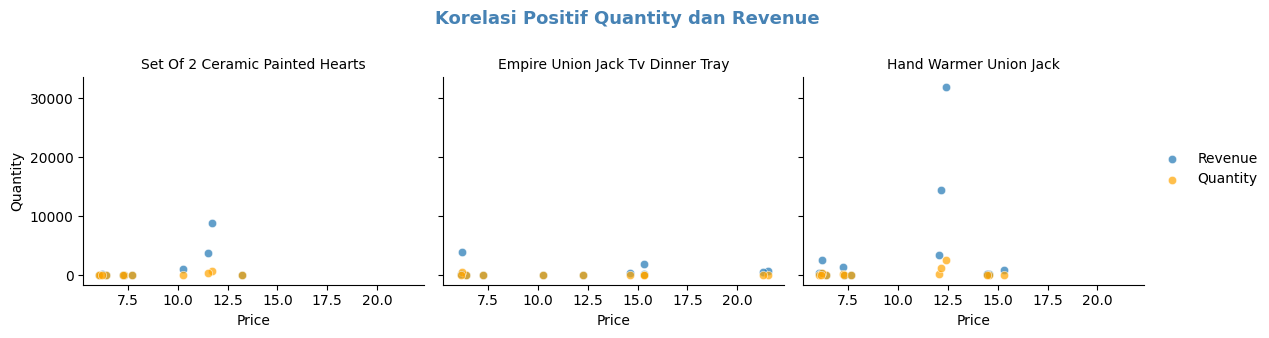

<Figure size 1000x500 with 0 Axes>

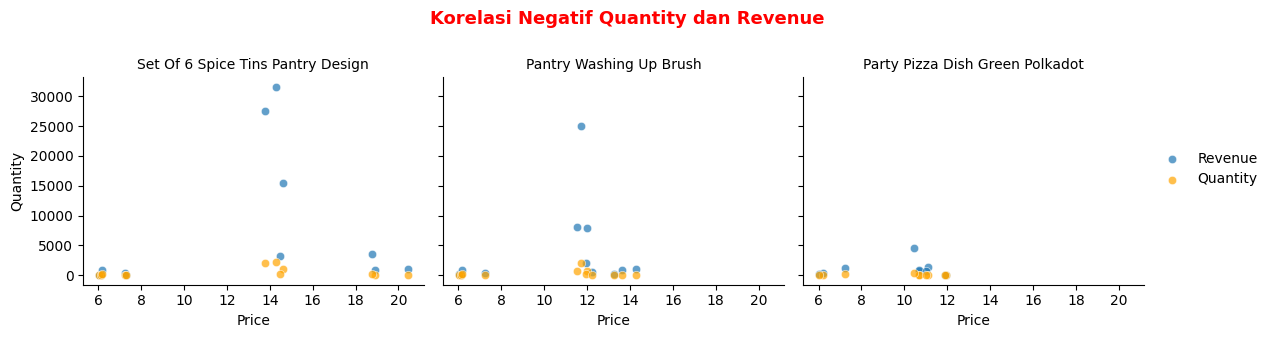

In [293]:
plt.figure(figsize=(20, 5))
col_values = [list_product['ProductName'].iloc[0],list_product['ProductName'].iloc[1],list_product['ProductName'].iloc[2]]
g = sns.FacetGrid(chng_prc_freq, col="ProductName", col_order=col_values, aspect=1.3)
g.map(sns.scatterplot, "Price", "revenue", alpha=.7, label='Revenue')
g.map(sns.scatterplot, "Price", "Quantity", alpha=.7, color='orange', label='Quantity')
g.set_titles(col_template="{col_name}", size=10)
g.add_legend()
plt.suptitle("Korelasi Positif Quantity dan Price", fontsize=13, y=1.11, fontweight='bold', color='steelblue')
plt.show()

plt.figure(figsize=(10, 5))
col_values = [list_product['ProductName'].iloc[-1],list_product['ProductName'].iloc[-2],list_product['ProductName'].iloc[-3]]
g = sns.FacetGrid(chng_prc_freq, col="ProductName", col_order=col_values, aspect=1.3)
g.map(sns.scatterplot, "Price", "revenue", alpha=.7, label='Revenue')
g.map(sns.scatterplot, "Price", "Quantity", alpha=.7, color='orange', label='Quantity')
g.set_titles(col_template="{col_name}", size=10)
g.add_legend()
plt.suptitle("Korelasi Negatif Quantity dan Price", fontsize=13, y=1.11, fontweight='bold', color='red')
plt.show()

## Conclusion

1.  Setiap produk memiliki harga idealnya masing masing agar tidak overprice dan underprice, dapat dicari berdasarkan riwayat floating harga penjualan yang berubah ubah
2. trend penjualan baik positif maupun negatif memiliki pola yang sama, yaitu ketika permintaan barang terus naik maka penjualan terus meningkat dan terdapat pada titik overprice dan terjadi penurunan minat pembeli yang signifikan 

# Basket Size Analysis

Ketika seorang pelanggan e-commerce menekan "add to cart", maka barang tersebut akan disimpan dalam sebuah "basket".  
Ketika melakukan checkout, maka semua barang dalam basket tersebut akan diproses dan dikirimkan.  
Ukuran dari basket dapat diukur melalui nilai GMV (Gross merchandise volume) yang merupakan total harga barang yang dibeli.  
Contoh : 
Pada tanggal 1 januari 2012
Tuan A membeli 1 shampoo seharga 15ribu dan 2 sabun seharga 20ribu masing-masing. Maka basket size tuan A adalah 55ribu rupiah.
Nyonya B hanya membeli 1 cemilan seharga 20 ribu, maka basket size dari nyonya B adalah 20 ribu rupiah.
Berarti total GMV ecommerce pada 1 januari 2012 adalah 75ribu rupiah, dengan rata-rata basket size sebesar 37.5 ribu rupiah per basket.

## Pertanyaan
1. Hitung rata-rata basket size dari seluruh transaksi per harinya, apakah konsisten atau ada perubahan ?
2. Apakah ada perbedaan ukuran basket dari negara yang berbeda ?

In [294]:
basket_size = df_sales.groupby([ 'Date','TransactionNo'])[['revenue']].sum().reset_index()
avg_basket_day = basket_size.groupby('Date')[['revenue']].mean().reset_index()

In [295]:
avg_basket_day.rename(columns={'revenue': 'avg_basket_size'}, inplace=True)

In [296]:
countries = df_sales['Country'].unique()
for country in countries:
    country_data = df_sales[df_sales['Country'] == country]
    daily_revenue = country_data.groupby(['Date', 'TransactionNo'])['revenue'].sum().reset_index()
    avg_basket_size = daily_revenue.groupby('Date')['revenue'].mean().reset_index()
    avg_basket_size.rename(columns={'revenue': f'{country}_avg_basket_size'}, inplace=True)
    avg_basket_day = pd.merge(avg_basket_day, avg_basket_size, on='Date', how='left')


1. Hitung rata-rata basket size dari seluruh transaksi per harinya, apakah konsisten atau ada perubahan ?

In [297]:
avg_basket_day.sort_values('avg_basket_size', ascending=False)

,Date,avg_basket_size,United Kingdom_avg_basket_size,Norway_avg_basket_size,Belgium_avg_basket_size,Germany_avg_basket_size,France_avg_basket_size,Austria_avg_basket_size,Netherlands_avg_basket_size,EIRE_avg_basket_size,...,Israel_avg_basket_size,Unspecified_avg_basket_size,United Arab Emirates_avg_basket_size,Canada_avg_basket_size,European Community_avg_basket_size,Bahrain_avg_basket_size,Brazil_avg_basket_size,Saudi Arabia_avg_basket_size,Lebanon_avg_basket_size,Lithuania_avg_basket_size
304,2019-12-09,25137.953864,29804.176667,12737.55,1456.18,1384.595000,649.950000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,2019-01-18,23041.361463,25946.424857,NaN,NaN,4419.820000,NaN,NaN,NaN,3357.660000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235,2019-09-20,7834.274143,8281.646563,1328.64,NaN,1207.880000,3407.350000,NaN,NaN,5825.590000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,2019-02-21,6827.164054,3306.178889,NaN,2160.08,4607.080000,2079.935000,NaN,69864.67,615.220000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,2019-08-11,6601.285373,4173.056290,NaN,3590.47,NaN,NaN,NaN,159953.82,8140.410000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,2019-08-14,1475.275200,1533.471667,NaN,NaN,NaN,78.560000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,2019-07-03,1464.934400,1458.868333,NaN,NaN,NaN,1610.520000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,2019-12-01,1426.217541,1444.585000,NaN,NaN,745.430000,1510.360000,NaN,NaN,1155.743333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293,2019-11-27,1248.541930,1243.023036,NaN,NaN,NaN,NaN,NaN,NaN,1557.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


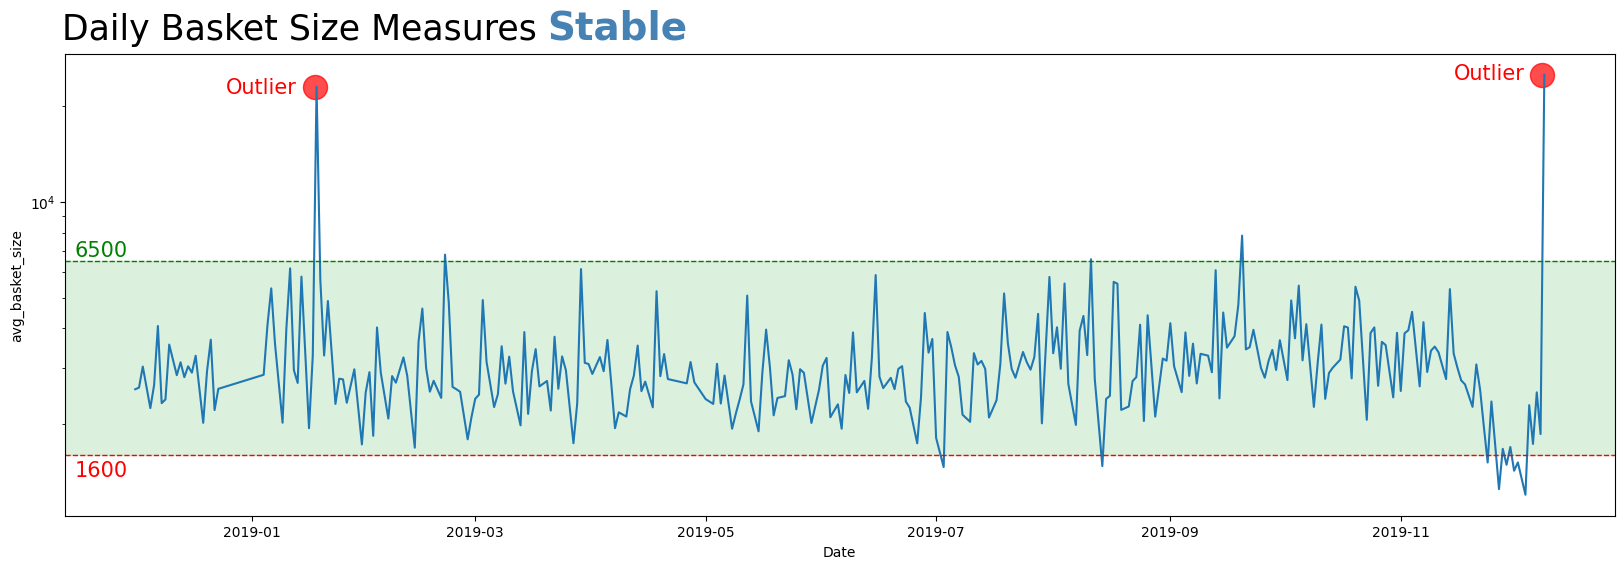

In [298]:
plt.figure(figsize=(20, 6))
plt.axhspan(1600,6500, alpha=0.2, color='#51bd55')
sns.lineplot(data=avg_basket_day, x="Date", y="avg_basket_size")
plt.scatter(x=17913.5, y=23000, color='red', marker='o', s=300,alpha=0.7)
plt.scatter(x=18238.5, y=25000, color='red', marker='o', s=300,alpha=0.7)
plt.text(18215, 24400, 'Outlier', fontsize=15, color='red')
plt.text(17890, 22000, 'Outlier', fontsize=15, color='red')
plt.axhline(y=6500 , color='green', linestyle='--', linewidth=1)
plt.axhline(y=1600 , color='red', linestyle='--', linewidth=1)
plt.text(17850, 6770, '6500', fontsize=15, color='green')
plt.text(17850, 1370, '1600', fontsize=15, color='red')
plt.text(17846.5, 32500, 'Daily Basket Size Measures', fontsize=25)
plt.text(17975, 32500, 'Stable', fontsize=28, fontweight='bold', color='steelblue')
plt.yscale('log')
plt.show()

2. Apakah ada perbedaan ukuran basket dari negara yang berbeda ?

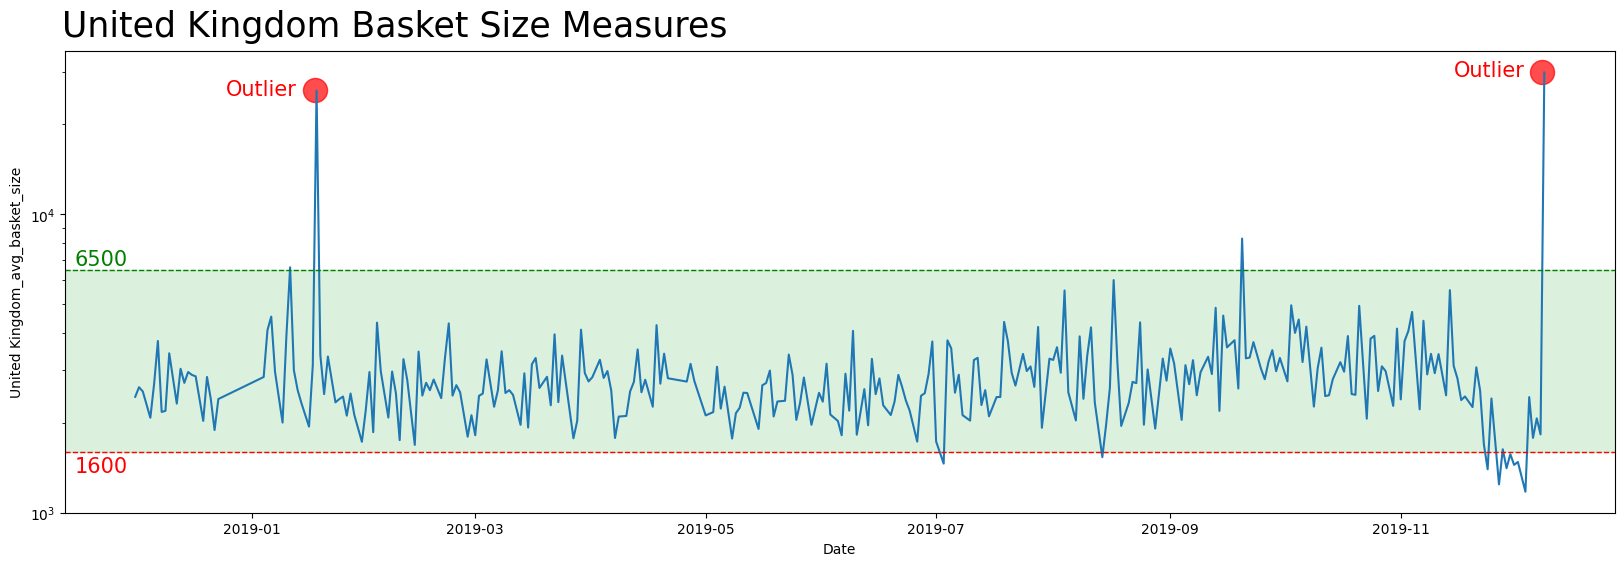

In [299]:
plt.figure(figsize=(20, 6))
plt.axhspan(1600,6500, alpha=0.2, color='#51bd55')
sns.lineplot(data=avg_basket_day, x="Date", y="United Kingdom_avg_basket_size")
plt.scatter(x=17913.5, y=26000, color='red', marker='o', s=300,alpha=0.7)
plt.scatter(x=18238.5, y=30000, color='red', marker='o', s=300,alpha=0.7)
plt.text(18215, 29000, 'Outlier', fontsize=15, color='red')
plt.text(17890, 25000, 'Outlier', fontsize=15, color='red')
plt.axhline(y=6500 , color='green', linestyle='--', linewidth=1)
plt.axhline(y=1600 , color='red', linestyle='--', linewidth=1)
plt.text(17850, 6770, '6500', fontsize=15, color='green')
plt.text(17850, 1370, '1600', fontsize=15, color='red')
plt.text(17846.5, 39500, 'United Kingdom Basket Size Measures', fontsize=25)
plt.yscale('log')
plt.show()

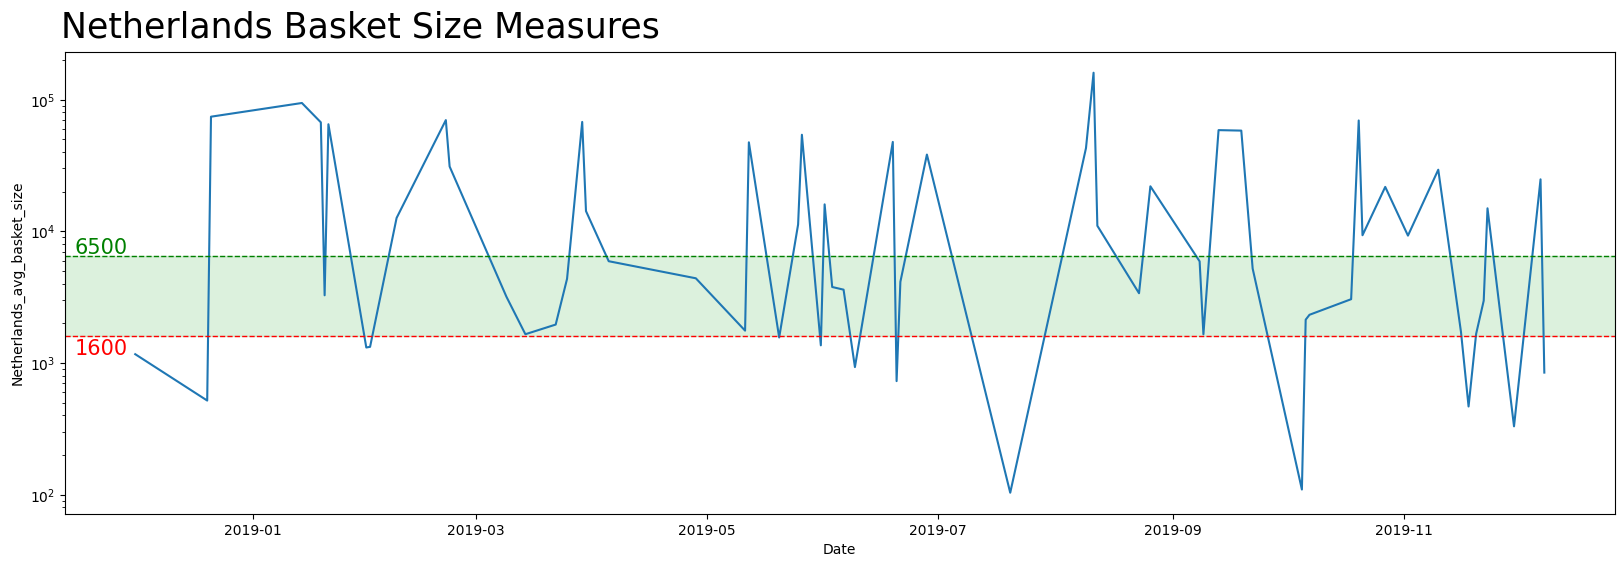

In [300]:
plt.figure(figsize=(20, 6))
plt.axhspan(1600,6500, alpha=0.2, color='#51bd55')
sns.lineplot(data=avg_basket_day, x="Date", y="Netherlands_avg_basket_size")
plt.axhline(y=6500 , color='green', linestyle='--', linewidth=1)
plt.axhline(y=1600 , color='red', linestyle='--', linewidth=1)
plt.text(17850, 6770, '6500', fontsize=15, color='green')
plt.text(17850, 1160, '1600', fontsize=15, color='red')
plt.text(17846.5, 299500, 'Netherlands Basket Size Measures', fontsize=25)
plt.yscale('log')
plt.show()

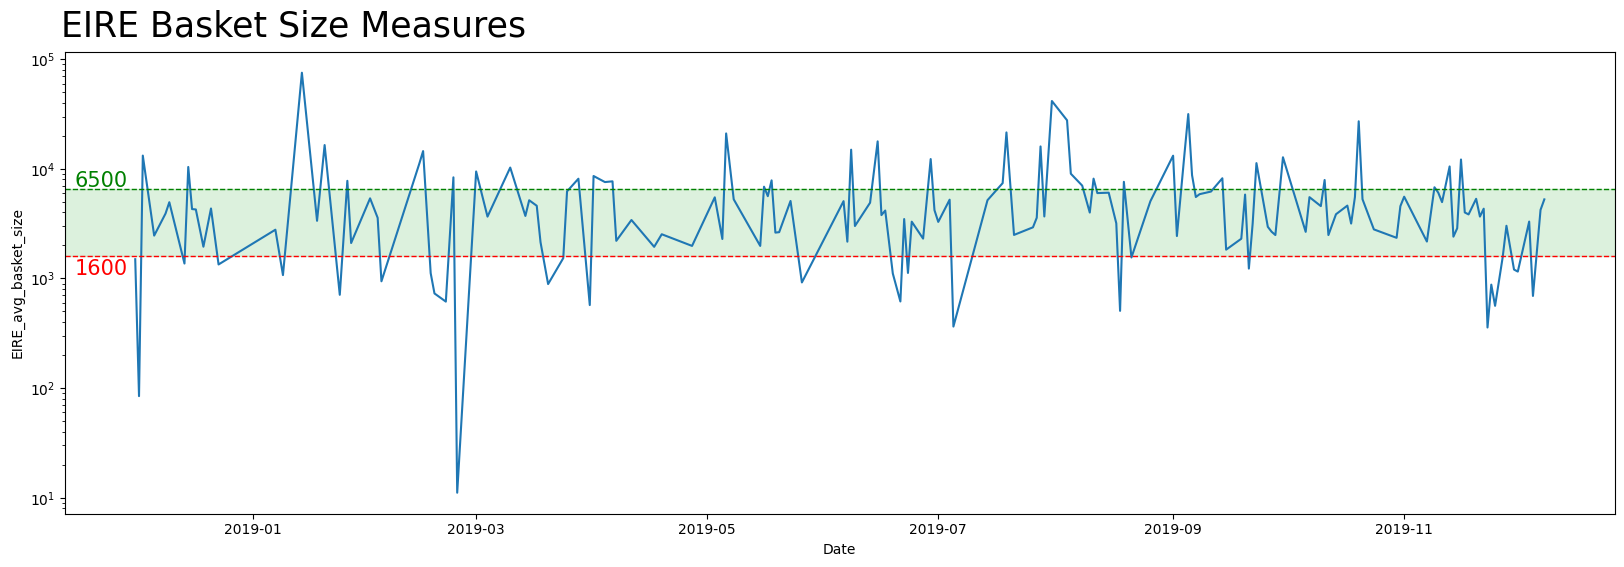

In [301]:
plt.figure(figsize=(20, 6))
plt.axhspan(1600,6500, alpha=0.2, color='#51bd55')
sns.lineplot(data=avg_basket_day, x="Date", y="EIRE_avg_basket_size")
plt.axhline(y=6500 , color='green', linestyle='--', linewidth=1)
plt.axhline(y=1600 , color='red', linestyle='--', linewidth=1)
plt.text(17850, 6770, '6500', fontsize=15, color='green')
plt.text(17850, 1070, '1600', fontsize=15, color='red')
plt.text(17846.5, 159500, 'EIRE Basket Size Measures', fontsize=25)
plt.yscale('log')
plt.show()

In [302]:
basket_size_cst = df_sales.groupby(['CustomerNo','TransactionNo'])[['Quantity','revenue']].sum().reset_index()
basket_size_cst = basket_size_cst.groupby('CustomerNo')['Quantity','revenue'].mean().reset_index()
basket_size_cst.sort_values(by='revenue', ascending=False, inplace=True)
chart_basket_size_cst = basket_size_cst.head(10)

In [303]:
chart_basket_size_cst = chart_basket_size_cst.merge(df_sales[['CustomerNo','Country']], on='CustomerNo', how='left')
chart_basket_size_cst.drop_duplicates(inplace=True)

In [304]:
chart_basket_size_cst

,CustomerNo,Quantity,revenue,Country
0,12346.0,74215.000000,840113.800,United Kingdom
1,16446.0,40498.500000,501370.785,United Kingdom
4,15941.0,14149.000000,184880.850,United Kingdom
105,14365.0,13956.000000,184148.760,United Kingdom
204,18251.0,7824.000000,84622.080,United Kingdom
220,14203.0,5963.000000,78231.140,United Kingdom
358,13256.0,12540.000000,77622.600,United Kingdom
359,15749.0,6009.333333,76802.800,United Kingdom
369,12590.0,4222.000000,49891.400,Germany
435,16754.0,4280.000000,45914.400,United Kingdom


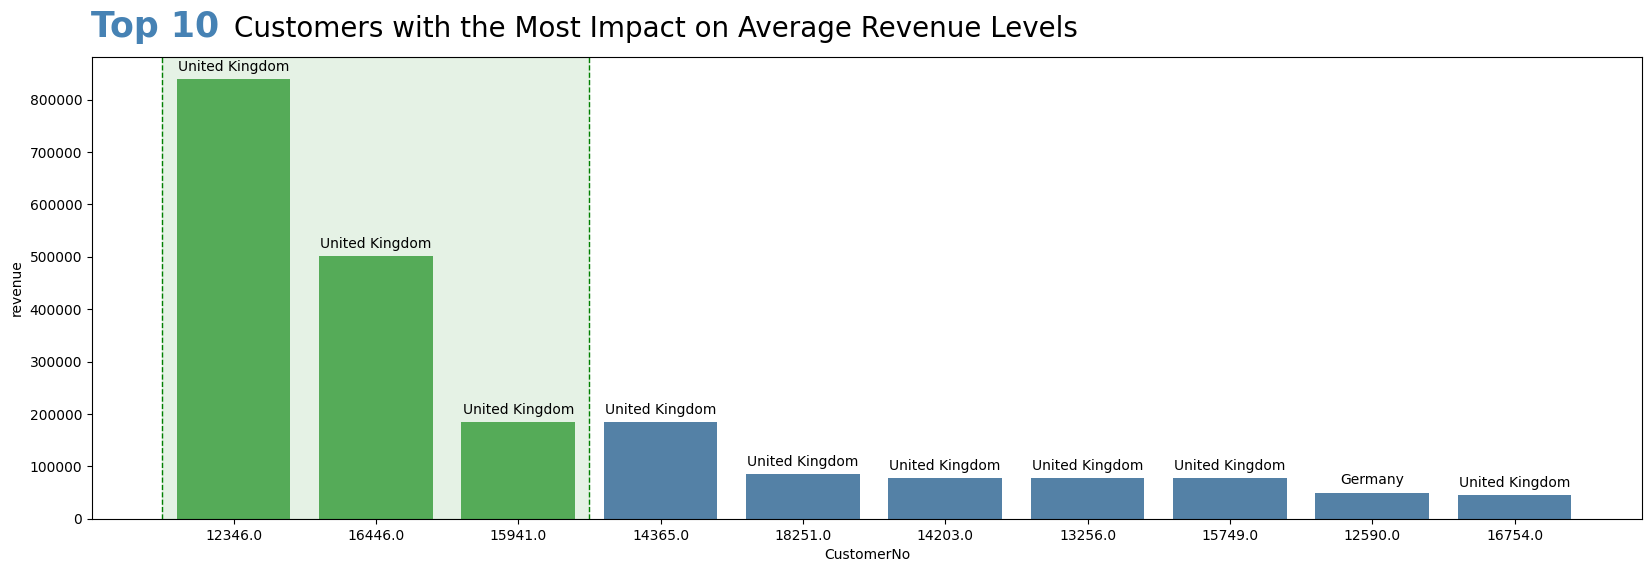

In [305]:
plt.figure(figsize=(20, 6))
palette = ['#51bd55' if i < 3 else 'steelblue' for i in range(10)]
sns.barplot(data=chart_basket_size_cst, x='CustomerNo', y='revenue', order=chart_basket_size_cst['CustomerNo'], palette=palette)
for index, value in enumerate(chart_basket_size_cst['Country']):
    plt.text(index, chart_basket_size_cst['revenue'].iloc[index] + 10000, value, ha='center', va='bottom')
plt.axvspan(-0.5, 2.5, color='green', alpha=0.1)
plt.axvline(x=2.5, color='green', linestyle='--', linewidth=1)
plt.axvline(x=-0.5, color='green', linestyle='--', linewidth=1)
plt.text(-1, 920000, 'Top 10', fontsize=25, fontweight='bold', color = 'steelblue')
plt.text(0, 920000, 'Customers with the Most Impact on Average Revenue Levels', fontsize=20)
plt.show()

In [306]:
bigest_trx = df_sales.groupby(['CustomerNo','TransactionNo'])[['Quantity','revenue']].sum().reset_index()
bigest_trx.sort_values(by='Quantity', ascending=False, inplace=True)

In [307]:
bigest_trx= bigest_trx.groupby('CustomerNo')['Quantity','revenue'].mean().reset_index()
bigest_trx.sort_values('Quantity', inplace=True, ascending=False)
chart_bigest_trx = bigest_trx.head(10)
chart_bigest_trx

,CustomerNo,Quantity,revenue
68,12346.0,74215.000000,840113.800
3302,16446.0,40498.500000,501370.785
2911,15941.0,14149.000000,184880.850
1666,14365.0,13956.000000,184148.760
800,13256.0,12540.000000,77622.600
4694,18251.0,7824.000000,84622.080
2759,15749.0,6009.333333,76802.800
1543,14203.0,5963.000000,78231.140
3544,16754.0,4280.000000,45914.400
272,12590.0,4222.000000,49891.400


In [308]:
chart_bigest_trx = chart_bigest_trx.merge(df_sales[['CustomerNo','Country']], on='CustomerNo', how='left')

In [309]:
chart_bigest_trx.drop_duplicates(inplace=True)

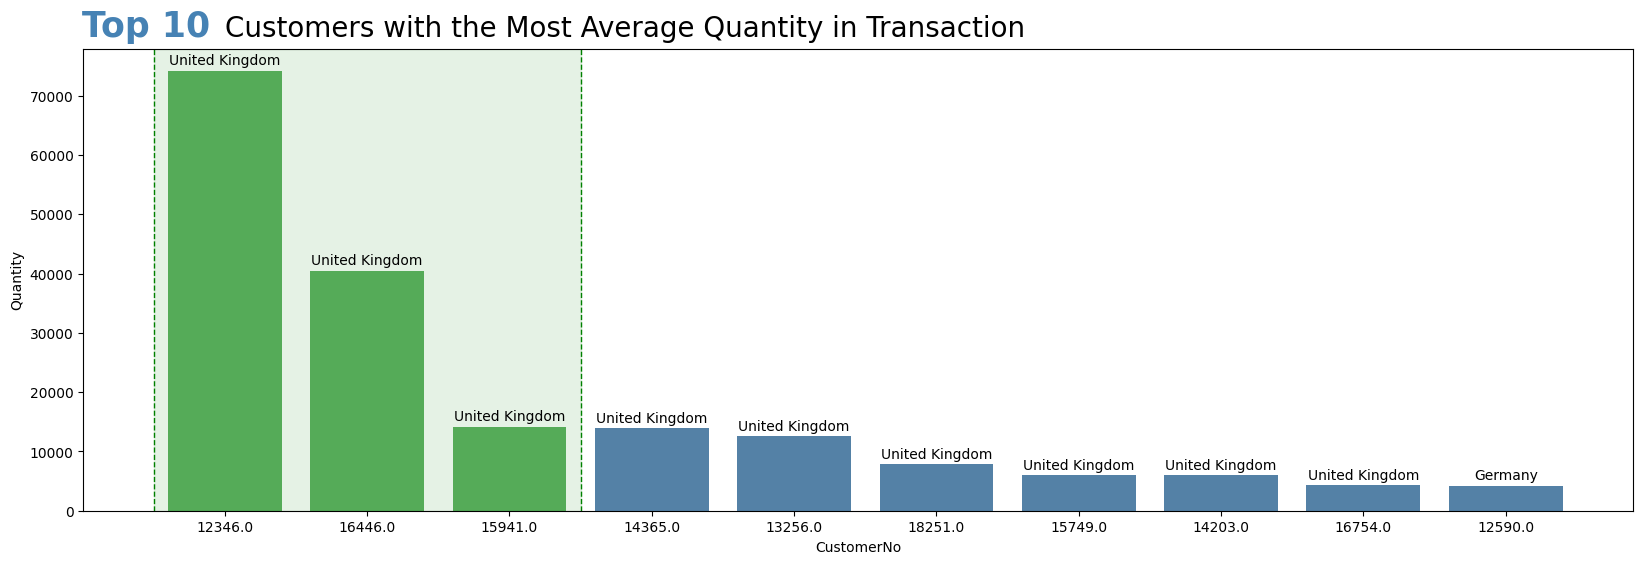

In [310]:
plt.figure(figsize=(20, 6))
palette = ['#51bd55' if i < 3 else 'steelblue' for i in range(10)]
sns.barplot(data=chart_bigest_trx, x='CustomerNo', y='Quantity', order=chart_bigest_trx['CustomerNo'], errorbar=None, palette=palette)
for index, value in enumerate(chart_bigest_trx['Country']):
    plt.text(index, chart_bigest_trx['Quantity'].iloc[index] + 500, value, ha='center', va='bottom')
plt.xlabel('CustomerNo')
plt.axvspan(-0.5, 2.5, color='green', alpha=0.1)
plt.axvline(x=2.5, color='green', linestyle='--', linewidth=1)
plt.axvline(x=-0.5, color='green', linestyle='--', linewidth=1)
plt.text(-1,80000, 'Top 10', fontsize=25, fontweight='bold', color = 'steelblue')
plt.text(0, 80000, 'Customers with the Most Average Quantity in Transaction', fontsize=20)
plt.show()

## Conclusion

1. United Kindom menjadi Negara dengan lokasi Customer paling berdampak secara revenue maupun quantity, ini menandakan keberhasilan penjualan pada negara tersebut.
2. trend Basket Size cenderung stabil pada rentan 6000 hingga 6500
3. Negara Netherland cenderung melakukan transaksi diatas rata rata sehingga meskipun customer sedikit, negara tersebut tetap sangat berdampak terhadap revenue perusahaan

# Crucial Question

Ini adalah 5 pertanyaan utama yang ditanyakan oleh pembuat dataset sales ini.  
Anda dapat menggunakan analisis yang sudah dikerjakan pada bagian sebelumnya, ataupun melakukan analisis baru untuk menjawab pertanyaan dibawah.

1. How was the sales trend over the months?
2. What are the most frequently purchased products?
3. How many products does the customer purchase in each transaction?
4. What are the most profitable segment customers?
5. Based on your findings, what strategy could you recommend to the business to gain more profit?

1. How was the sales trend over the months?

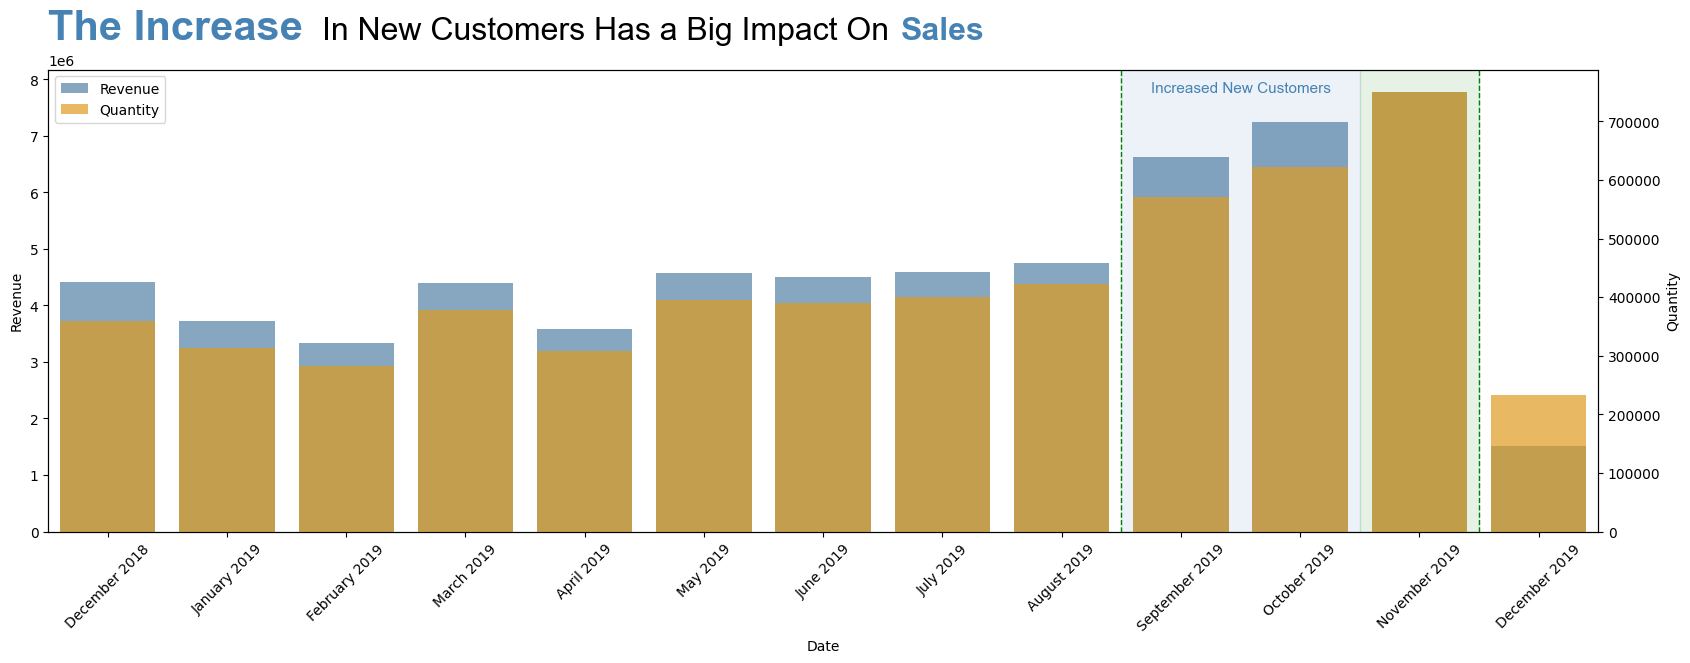

In [311]:
fig, ax1 = plt.subplots(figsize=(20, 6))

sns.barplot(data=annual_sales, y='revenue', x='Date', color='steelblue', label='Revenue', ax=ax1, alpha=0.7)
ax1.set_xlabel('Date')
ax1.set_ylabel('Revenue')
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', rotation=45)
plt.axvspan(8.5, 10.5, color='steelblue', alpha=0.1)
plt.axvspan(10.5, 11.5, color='green', alpha=0.1)

ax2 = ax1.twinx()
sns.barplot(data=annual_sales, y='Quantity', x='Date', color='orange', label='Quantity', ax=ax2 , alpha=0.7)
ax2.set_ylabel('Quantity')
ax2.tick_params(axis='y')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
plt.axvline(x=8.5, color='green', linestyle='--', linewidth=1)
plt.axvline(x=11.5, color='green', linestyle='--', linewidth=1)
plt.text(8.75, 750000, 'Increased New Customers', ha='left', fontsize=11,fontname='Arial', color = 'steelblue')
plt.text(-0.5, 840000, 'The Increase', ha='left', fontsize=30,fontname='Arial', color = 'steelblue', fontweight='bold')
plt.text(1.8, 840000, 'In New Customers Has a Big Impact On', ha='left', fontsize=23,fontname='Arial')
plt.text(6.65, 840000, 'Sales', ha='left', fontsize=23,fontname='Arial', color = 'steelblue', fontweight='bold')

plt.show()


2. What are the most frequently purchased products?

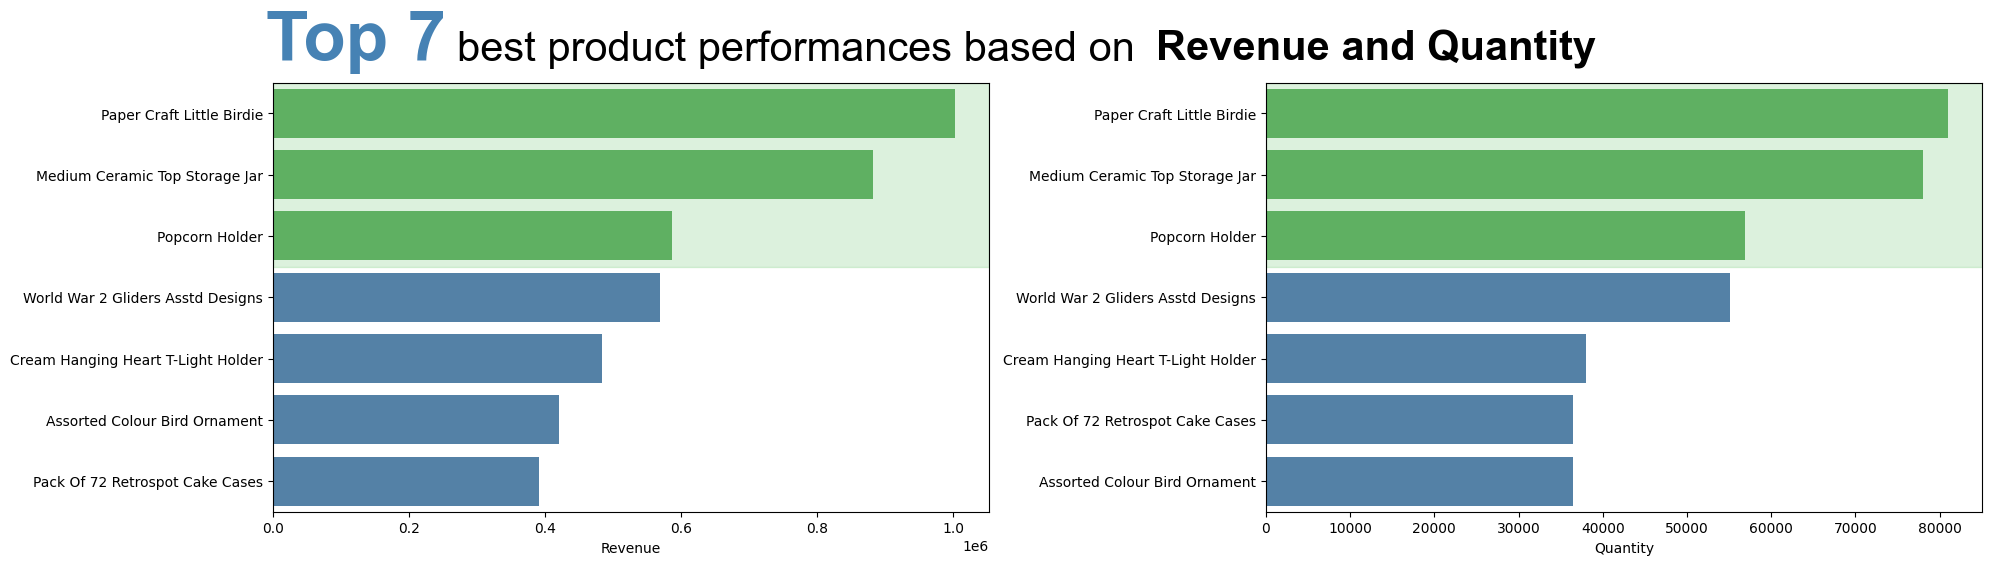

In [312]:
fig = plt.figure(figsize=(20, 5))
gs = GridSpec(1, 2, width_ratios=[1, 1])

ax0 = plt.subplot(gs[0])
ax0.axhspan(-0.5, 2.5, alpha=0.2, color='#51bd55')
palette = ['#51bd55' if i < 3 else 'steelblue' for i in range(7)]
sns.barplot(ax=ax0, data=df_seg_prod.head(7), x='revenue', y='ProductName', errorbar=None, orient='h', palette=palette)
ax0.set_ylabel('')
ax0.set_xlabel('Revenue')

ax1 = plt.subplot(gs[1])
ax1.axhspan(-0.5, 2.5, alpha=0.2, color='#51bd55')
palette_quantity = ['#51bd55' if i < 3 else 'steelblue' for i in range(7)]
sns.barplot(ax=ax1, data=df_seg_prod.head(7).sort_values(by='Quantity', ascending=False), x='Quantity', y='ProductName', errorbar=None, orient='h', palette=palette_quantity)
ax1.set_ylabel('')
ax1.set_xlabel('Quantity')

fig.text(0.18, 1.055, 'Top 7', ha='center', va='center', fontsize=50, fontweight='bold', color='steelblue', fontname='Arial')
fig.text(0.4, 1.04, 'best product performances based on', ha='center', va='center', fontsize=30,fontname='Arial')
fig.text(0.69, 1.04, 'Revenue and Quantity', ha='center', va='center', fontsize=30, fontweight='bold',fontname='Arial')

plt.tight_layout(pad=1)
plt.show()


3. How many products does the customer purchase in each transaction?

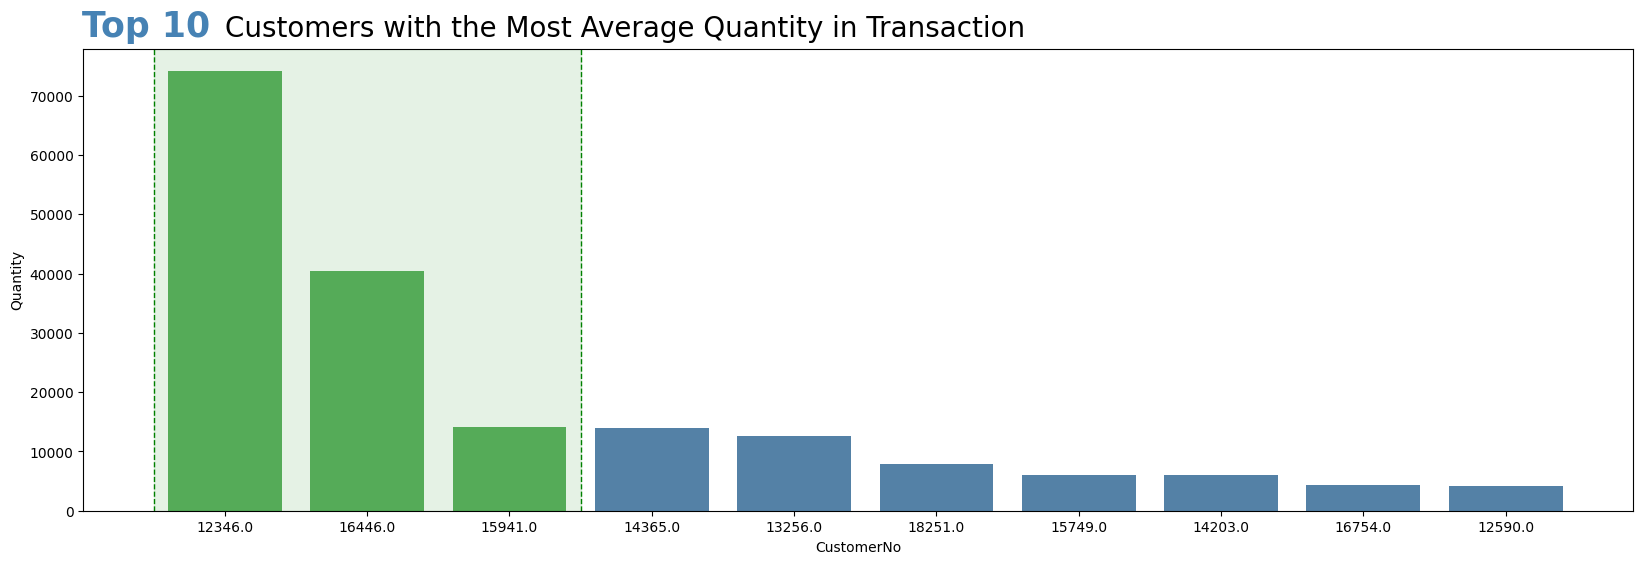

In [313]:
plt.figure(figsize=(20, 6))
palette = ['#51bd55' if i < 3 else 'steelblue' for i in range(10)]
sns.barplot(data=chart_bigest_trx, x='CustomerNo', y='Quantity', order=chart_bigest_trx['CustomerNo'], errorbar=None, palette=palette)
plt.xlabel('CustomerNo')
plt.axvspan(-0.5, 2.5, color='green', alpha=0.1)
plt.axvline(x=2.5, color='green', linestyle='--', linewidth=1)
plt.axvline(x=-0.5, color='green', linestyle='--', linewidth=1)
plt.text(-1,80000, 'Top 10', fontsize=25, fontweight='bold', color = 'steelblue')
plt.text(0, 80000, 'Customers with the Most Average Quantity in Transaction', fontsize=20)
plt.show()

4. What are the most profitable segment customers?

- Segment Customer yang sangat profitabel adalah customer yang berasal dari negara Netherland dan Australia, jumlah customer sedikit namun tetap memberikan dampak sigifikan terhadap revenue perusahaan
- Customer yang berasal dari negara United Kingdom pun tetap harus dipertahankan mengingat pasar yang sudah sangat baik pada negara tersebut
- Kesan baik harus ditunjukan kepada Customer Baru karena berpotensi berlangganan longterm dan tentu akan berdampak baik terhadap perusahaan, terbukti dengan penambahan customer baru pada bulan september dampaknya cukup terasa terhadap kenaikan revenue perusahaan

5. Based on your findings, what strategy could you recommend to the business to gain more profit?

- Perluasan Wilayah pemasaran ke negara Netherland dan Australia.
- Marketing terbaik untuk menambah customer baru terdapat pada bulan September, dapat dilakukan evaluasi dan penerapan untuk marketing kedepannya
- Treatment terhadapa old customer pun sangat penting agar melakukan repeat order dan tidak churn, seperti penawaran khusus pembelian ke-sekian dan program ulang tahun customer, direkomendasikan juga fitur saran untuk customer berdaskan riwayat.
- Memperluas cakupan customer dapat dengan menerapkan program ciri khas e-commerce seperti diskon besar di tanggal tertentu dan program referall, sehingga old customer dapat menggaet new customer.
- Penjualan pada akhir tahun cenderung terhadap alat alat pesta dan perhiasan, dapat dijadikan strategi untuk melakukan campaign khusus untuk menarik pelanggan berbelanja baik untuk old customer maupun mencari new customer
- Barang non pesta pun dapat dilakukan sale akhir tahun karena customer cenderung mengeluarkan uang pada akhir tahun karena kebutuhan liburan dan hari raya
- Harga yang sering mengalami perubahan akan cukup berdampak terhadap penjualan, dapat diberikan rekomendasi harga terhadap produk yang dijual sehingga seller dapat menerapkan harga ideal dan mengurahi produk yang overprice atau underprice
- Penambahan feature kategori produk untuk memudahkan melakukan segmentasi produk sehingga analisis dapat lebih baik
